# Olah Data Mobil Bekas Website OLX.com
1. Import Library
2. Membaca Dateset
3. Memahami Dataset

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


## Membaca Dataset

In [2]:
# Membaca dataset dari dataset "data_olx.csv" serta mengubah tipe data pada kolom "display_date" menjadi datetime
df=pd.read_csv('datasets/data_olx.csv',parse_dates=['display_date'])
# Mengubah format nama kolom menjadi huruf kecil semua
df.columns=df.columns.str.replace(' ','_').str.lower()
# Mengecek 5 baris pertama dari data set
df.head()


,location_resolved,display_date,title,harga,merek,model,varian,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual,nama_bursa_mobil
0,Ngaglik,2022-12-21 07:11:44+00:00,[DP8JT] VIOS G 1.5 MANUAL 2017 ISTIMEWA,138000000.0,Toyota,Vios,1.5 G Bensin-MT,2017,85.000-90.000,Bensin,Hitam,Manual,Sedan,>1.000 - 1.500 cc,Diler,NaN
1,Piyungan,2022-12-20 11:05:44+00:00,Yaris E Upgrade TRD Sportivo 1.5 M/T Th’2008,97900000.0,Toyota,Yaris,toyota-yaris-67591-e,2008,145.000-150.000,Bensin,Silver,Manual,NaN,>1.000 - 1.500 cc,Diler,NaN
2,Wates,2022-12-22 07:40:38+00:00,[PAJAK PANJANG] Yaris TRD Sportivo m/t 2012 Si...,121000000.0,Toyota,Yaris,toyota-yaris-67596-trd-sportivo,2012,85.000-90.000,Bensin,Silver,Manual,Compact & City Car,>1.000 - 1.500 cc,Individu,NaN
3,Wonosari,2022-12-22 07:40:07+00:00,Toyota Camry 2.5 V Bensin a/t 2014 Hitam,221000000.0,Toyota,Camry,2.5 V Bensin-AT,2014,55.000-60.000,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Individu,NaN
4,Pleret,2022-12-22 09:45:17+00:00,Avanza G thn 2015 asli ab manual,133000000.0,Toyota,Avanza,1.3 G Bensin-MT,2015,90.000-95.000,Bensin,Silver,Manual,Minibus,>1.000 - 1.500 cc,NaN,NaN


In [3]:
# Mengecek informasi dari dataset menggunakan methode .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   location_resolved  4975 non-null   object             
 1   display_date       4975 non-null   datetime64[ns, UTC]
 2   title              4975 non-null   object             
 3   harga              4975 non-null   float64            
 4   merek              4975 non-null   object             
 5   model              4975 non-null   object             
 6   varian             4944 non-null   object             
 7   tahun              4975 non-null   object             
 8   jarak_tempuh       4975 non-null   object             
 9   tipe_bahan_bakar   4975 non-null   object             
 10  warna              4975 non-null   object             
 11  transmisi          4975 non-null   object             
 12  tipe_bodi          3862 non-null   object       

Dari hasil pemahaman di atas dapat diketahui bahwa dataset memiliki 16 variabel/fitur dengan tipe data sebagai berikut:
- Kategorikal 
    - Nominal
        1. location_resolved
        3. merek
        4. model
        5. varian
        6. warna
        7. transmisi
        8. tipe_penjual
        9. nama_bursa_mobil

    - Ordinal
        1. tahun
        2. jarak_tempuh
        3. tipe_bahan_bakar
        4. tipe_bodi
        5. kapasitas_mesin
        
- Numerik
    - Diskrit
        1. harga (target)
        
    - Kontinus
        1. -
- Other
    - Datetime
        1. display_date
    
    - Text
        1. title

## Explorasi Analisis Data (Exploratory Data Analysis) A.K.A EDA


In [4]:
# Memilih variabel dengan tipe data objek dan menyimpannya ke dalam variabel colcat
colcat=df.select_dtypes('O').columns.to_list()
# Menampilkan list dari variabel colcat
colcat

['location_resolved',
 'title',
 'merek',
 'model',
 'varian',
 'tahun',
 'jarak_tempuh',
 'tipe_bahan_bakar',
 'warna',
 'transmisi',
 'tipe_bodi',
 'kapasitas_mesin',
 'tipe_penjual',
 'nama_bursa_mobil']

#### Memvisualisasikan sebaran data berdasarkan tipe data

In [5]:
# Menyimpan nilai ukuran grafik ke dalam variabel size
size=(11,6)

# Membuat Function untuk menampilkan grafik sebaran data bertipe numerik 
def num_dist(data,var):
  # Menginisialisasi kanvas grafik
  fig,ax=plt.subplots(1,2,figsize=size)
  
  # Membuat grafik histogram
  sns.histplot(x=var,data=data,kde=True,ax=ax[0])
  ax[0].set_title(f'{var} Distribution Histogram')
  
  # Membuat grafik boxplot
  sns.boxplot(x=var,data=data,ax=ax[1])
  ax[1].set_title(f'{var} Distribution Boxplot')

# Membuat function untuk menampilkan grafik sebaran data bertipe kategorikal
def cat_dist(data,var,value:bool|int=False):
  
  # Pengkondisian jika variabel value bernilai True
  if value:
    
    # Menginisialisasi kanvas grafik
    fig,ax = plt.subplots(2,1,figsize=size)
    
    # Membuat grafik barplot nilai dengan frekuensi tertinggi
    df=data[var].dropna().value_counts()
    df=df.head(value) if value else df
    sns.barplot(x=df.values,y=df.index,ax=ax[0])
    ax[0].set_title(f'Top {value if value else ""} {var}')
    
    # Menampilkan grafik barplot nilai dengan frekuensi terendah
    df=data[var].dropna().value_counts()
    df=df.sort_values().head(value) if value else df.sort_values()
    sns.barplot(x=df.values,y=df.index,ax=ax[1])
    ax[1].set_title(f'Bottom {value } {var}')
  
  # Pengkondisian jika variabel value tidak bernilai True
  else:
    
    # Membuat kanvas grafik
    fig,ax = plt.subplots(1,1,figsize=size)
    
    # Membuat grafik barplot dengan nilai frekuensi tertinggi
    df=data[var].dropna().value_counts()
    sns.barplot(x=df.values,y=df.index,ax=ax)
    ax.set_title(f'Top {value if value else ""} {var}')


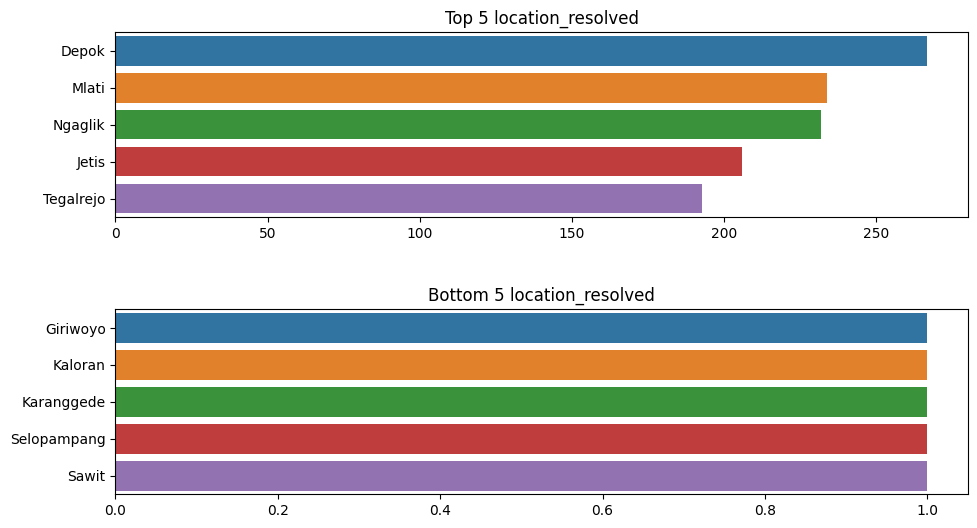

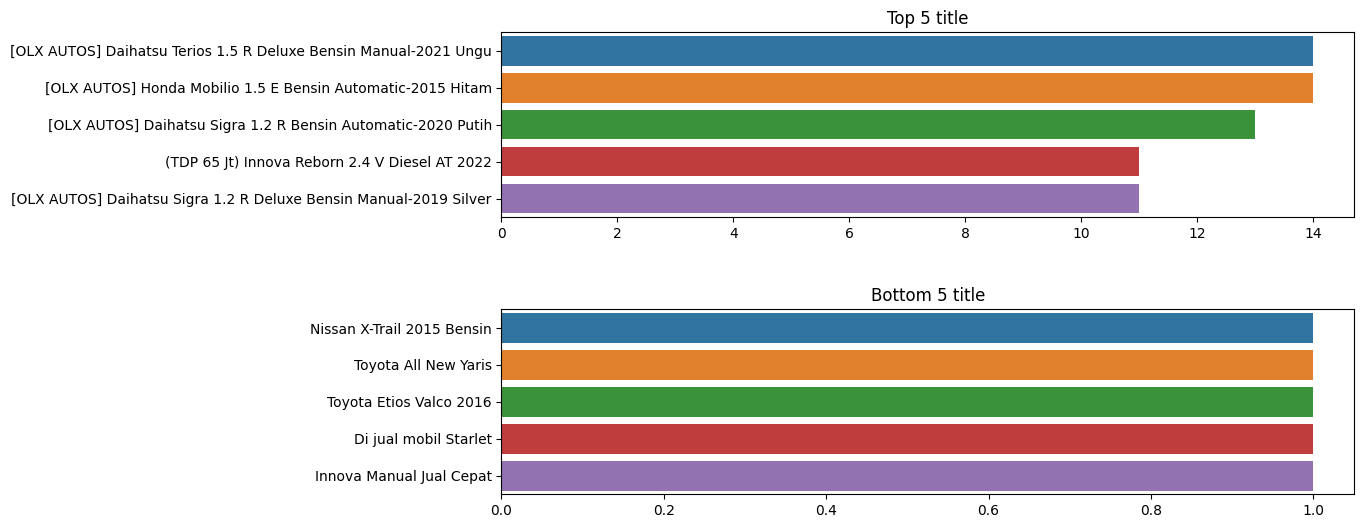

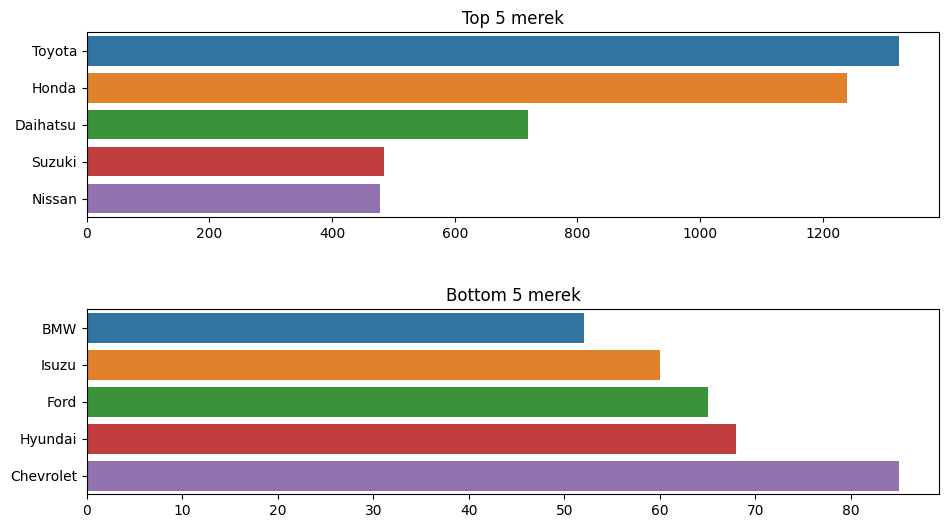

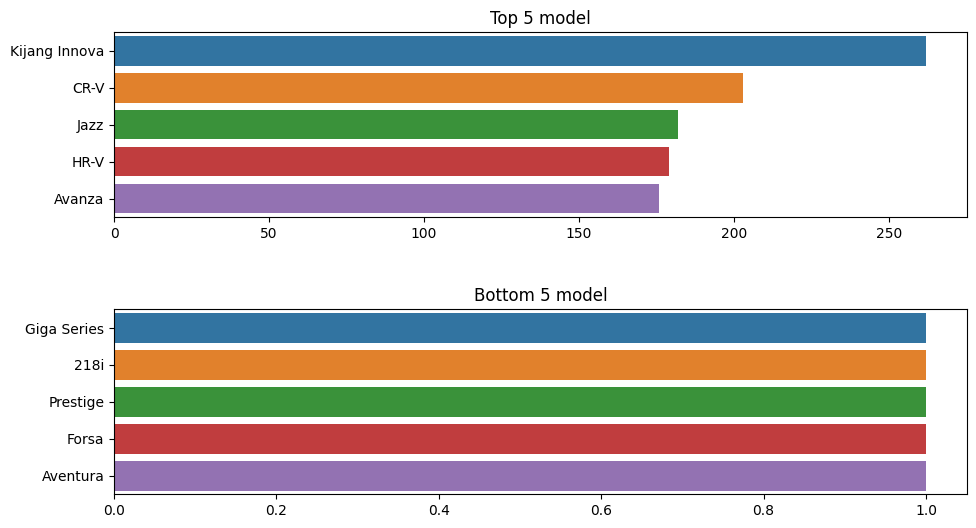

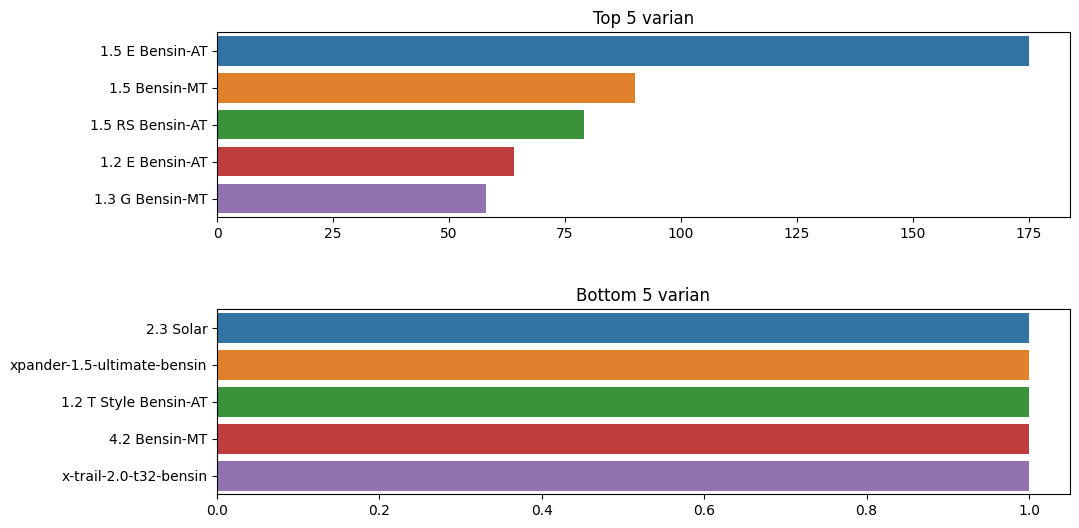

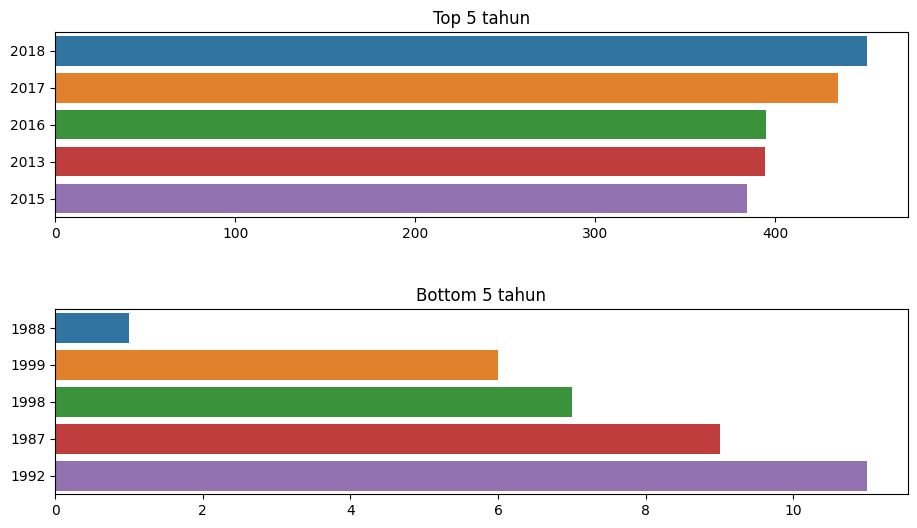

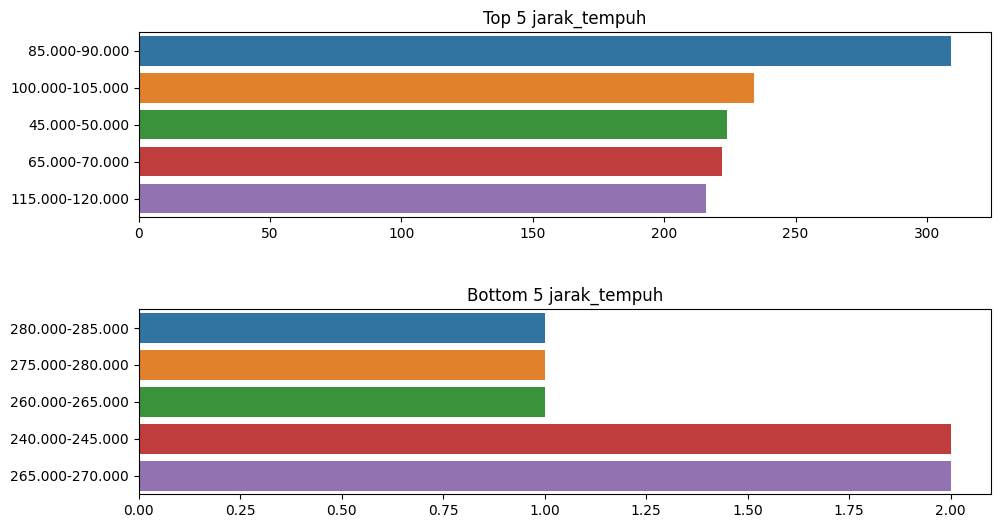

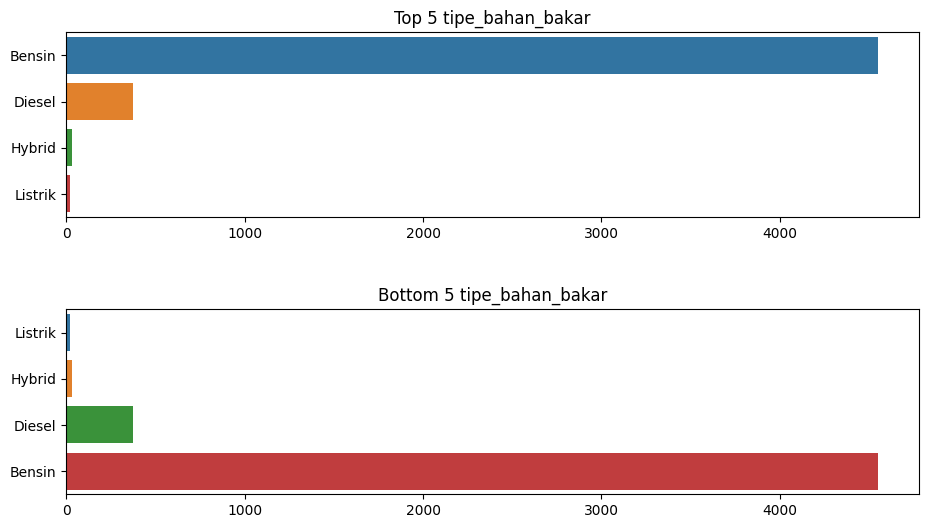

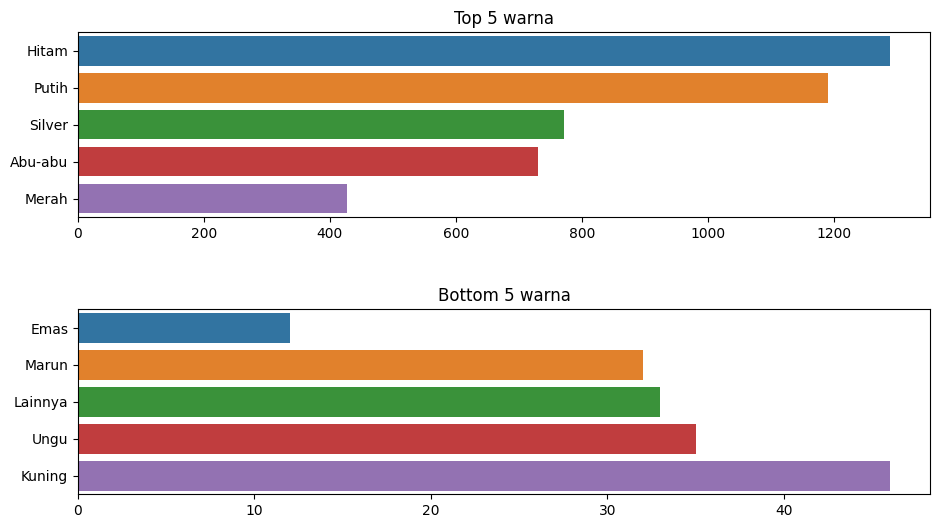

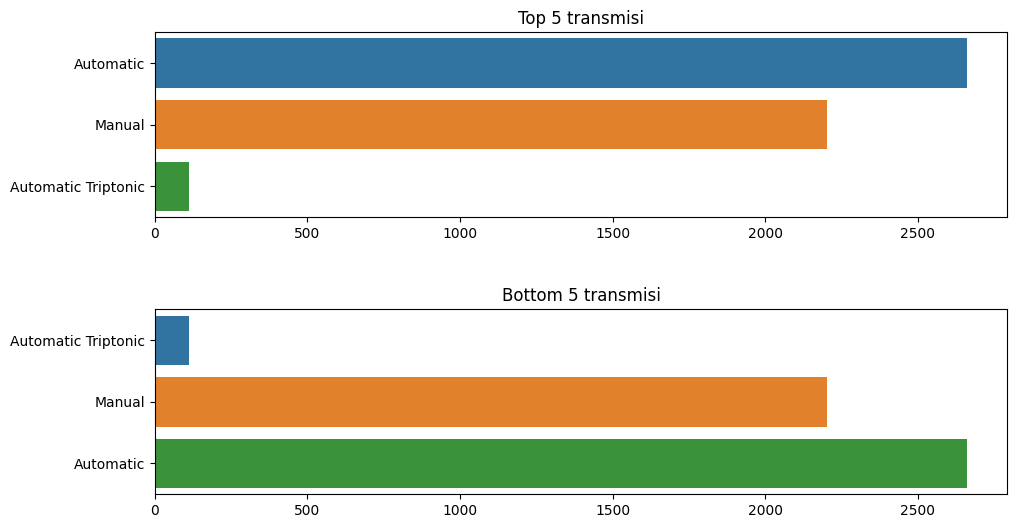

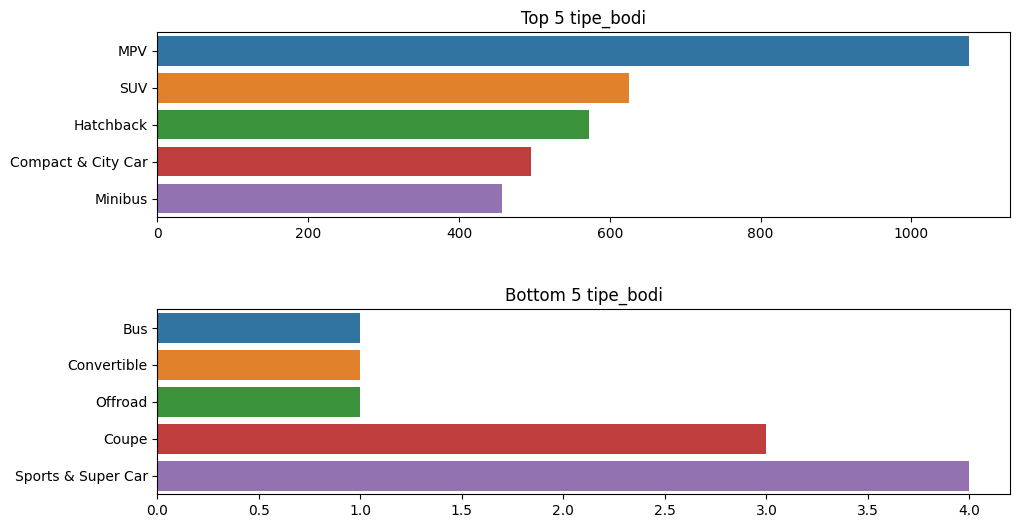

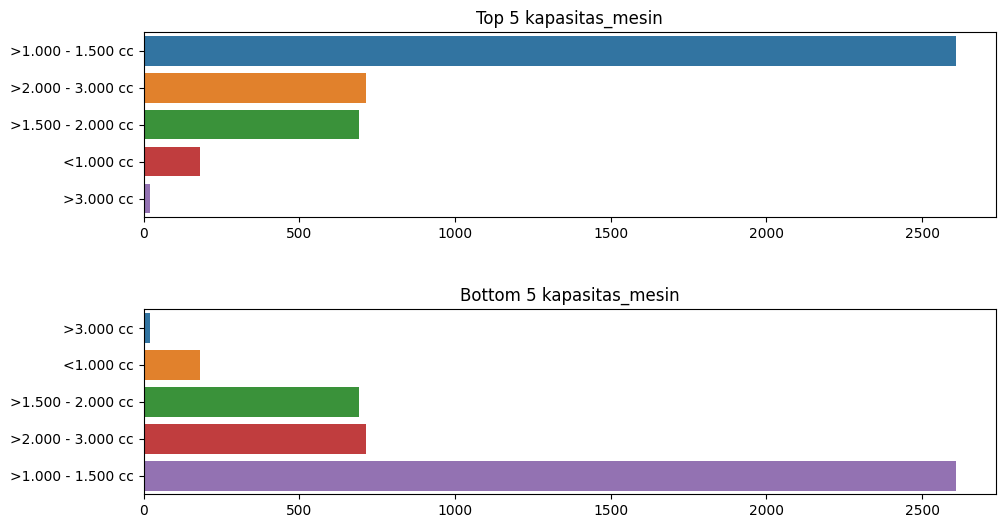

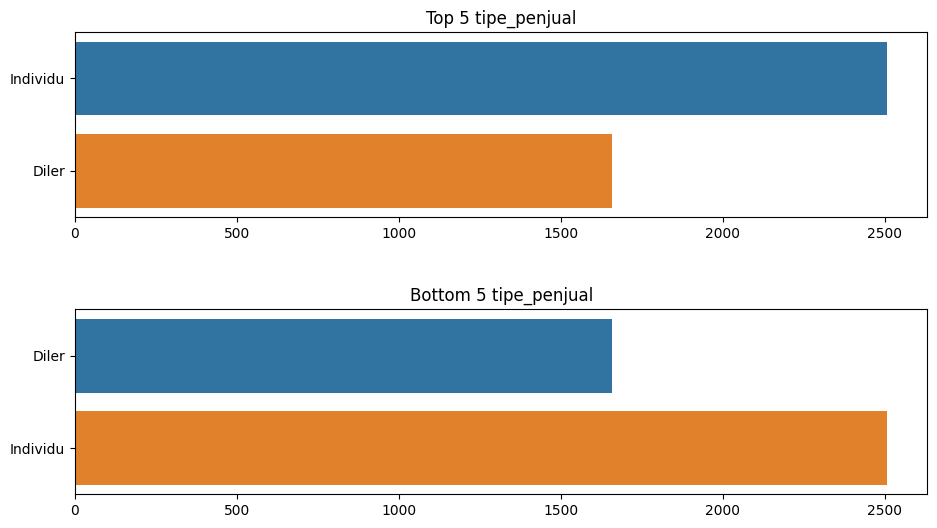

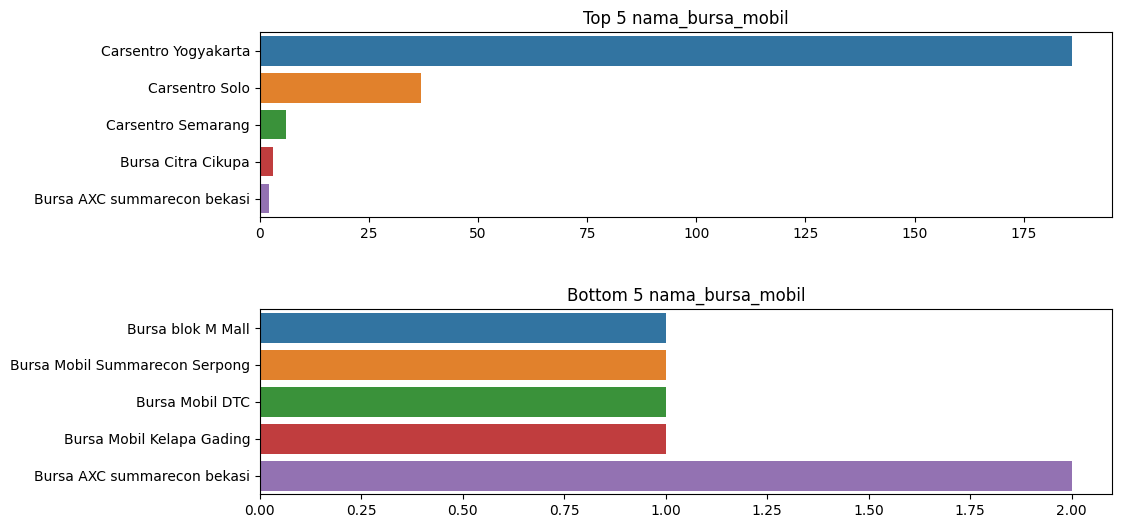

In [6]:
for col in colcat:
    cat_dist(df,col,value=5)
    plt.subplots_adjust(hspace=.5)

Berdasarkan hasil visualisasi di atas kita mendapat pengetahuan berupa:
- variabel `location_resolved` yaitu

    5 teratas:

        1. Depok
        2. Mlati
        3. Ngaglik
        4. Jetis
        5. Tegal rejo

    5 Terbawah bernilai invalid karena nilai tidak beragam
    
- variabel `title` yaitu:

    5 teratas:
    
        1. [OLX AUTOS] Daihatsu Terios 1.5 R Deluxe Bensin Manual-2021 Ungu
        2. [OLX AUTOS] Honda Mobilio 1.5 E Bensin Automatic-2015 Hitam
        3. [OLX AUTOS] Daihatsu Sigra 1.2 R Bensin Automatic-2020 Putih
        4. (TDP 65 Jt) Innova Reborn 2.4 V Diesel AT 2022
        5. [OLX AUTOS] Daihatsu Sigra 1.2 R Deluxe Bensin Manual-2019 Silver
        6. [OLX AUTOS] Mazda Biante 2.0 Skyactive Bensin Automatic-2017 Hitam
        7. (TDP 15 Jt) Datsun Go+ Panca T Option MT 2016
        8. [OLX AUTOS] Toyota Kijang Innova 2.0 V Bensin Automatic-2013 Silver
        9. [OLX AUTOS] Daihatsu Ayla 1.2 R Bensin Manual-2020 Putih
        10. [OLX AUTOS] Daithatsu Terios 1.5 R  Bensin Manual-2021 #flashsale

- variabel `merek` yaitu:
    5 teratas:
       1. Toyota 
       2. Honda 
       3. Daihatsu 
       4. Suzuki 
       5. Nissan

    5 terbawah:

        1. Chevrolet 
        2. Hyundai 
        3. Ford 
        4. Isuzu 
        5. BMW

- variabel `model` yaitu:

    5 teratas:
        1. Kijang Innova 
        2. CR-V 
        3. Jazz 
        4. HR-V 
        5. Avanza

    5 Terbawah bernilai invalid karena nilai tidak beragam

- variabel `varian` yaitu:
    5 teratas:
        1. 1.5 E Bensin-AT 
        2. 1.5 Bensin-MT 
        3. 1.5 RS Bensin-AT
        4. 1.2 E Bensin-AT 
        5. 1.3 G Bensin-MT

    5 Terbawah bernilai invalid karena nilai tidak beragam

- variabel `tahun` yaitu:

    5 teratas:

        1. 2018 
        2. 2017 
        3. 2016 
        4. 2013 
        5. 2015
    
    5 Terbawah:

        1. 1992 
        2. 1987 
        3. 1998 
        4. 1999 
        5. 1988

- variabel `jarak_tempuh` yaitu:

    5 teratas:

        1. 85.000-90.000 
        2. 100.000-105.000 
        3. 45.000-50.000 
        4. 65.000-70.000
        5. 115.000-120.000

    5 Terbawah:
        1. 265.000-270.000 
        2. 240.000-245.000 
        3. 260.000-265.000
        4. 275.000-280.000 
        5. 280.000-285.000

- variabel `tipe_bahan_bakar` yaitu:

    5 teratas:

        1. Bensin 
        2. Diesel 
        3. Hybrid 
        4. Listrik

    5 Terbawah bernilai invalid karena jumlah nilai unik tidak lebih dari 5

- variabel `warna` yaitu:

    5 teratas:

        1. Hitam 
        2. Putih 
        3. Silver 
        4. Abu-abu 
        5. Merah

    5 Terbawah: 

        1. Kuning 
        2. Ungu 
        3. Lainnya 
        4. Marun 
        5. Emas
        
- variabel `transmisi` yaitu:

    5 teratas:

        1. Automatic 
        2. Manual 
        3. Automatic Triptonic

    5 Terbawah bernilai invalid karena jumlah nilai unik tidak lebih dari 5
     
- variabel `tipe_bodi` yaitu:

    5 teratas:

        1. MPV 
        2. SUV 
        3. Hatchback 
        4. Compact & City Car 
        5. Minibus

    5 Terbawah:

        1. Sports & Super Car 
        2. Coupe 
        3. Convertible 
        4. Offroad 
        5. Bus

- variabel `kapasitas_mesin` yaitu:

    5 teratas:
    
        1. >1.000 - 1.500 cc 
        2. >2.000 - 3.000 cc 
        3. >1.500 - 2.000 cc
    
    5 Terbawah bernilai invalid karena jumlah nilai unik tidak lebih dari 5
    
- variabel `tipe_penjual` yaitu:

    5 teratas:

        1. Individu 
        2. Diler
    
    5 Terbawah bernilai invalid karena jumlah nilai unik tidak lebih dari 5
    
- variabel `nama_bursa_mobil` yaitu:

    5 teratas:
    
        1. Carsentro Yogyakarta 
        2. Carsentro Solo 
        3. Carsentro Semarang
        4. Bursa Citra Cikupa 
        5. Bursa AXC summarecon bekasi

    5 Terbawah:

        1. Bursa AXC summarecon bekasi 
        2. Bursa blok M Mall
        3. Bursa Mobil Summarecon Serpong 
        4. Bursa Mobil DTC
        5. Bursa Mobil Kelapa Gading

Hasil visualisasi juga menunjukan bahwa banyak nilai unik di suatu variabel memiliki nilai frekuensi yang rendah. hal ini berdampak pada pembuatan model saat pemisahan data menjadi training data dan test data yaitu terjadinya nilai unik yang tidak dikenali model karena saat melakukan fitting, nilai tersebut tidak ada. Untuk menanganinya adalah dengan menghilangkan baris yang memiliki nilai unik dengan frekuensi kurang dari 10, dengan begitu menghilangkan terjadinya nilai yang tidak masuk ke dalam proses fitting. 


#### Menghitung nilai unik di setiap variabel 

In [7]:

num_uniq=df.nunique().to_frame('num_uniq_value')
num_uniq['percentage_to_shape']=(num_uniq.num_uniq_value/df.shape[0]*100).round(2)
num_uniq

,num_uniq_value,percentage_to_shape
location_resolved,182,3.66
display_date,4903,98.55
title,4183,84.08
harga,660,13.27
merek,13,0.26
model,243,4.88
varian,1073,21.57
tahun,38,0.76
jarak_tempuh,59,1.19
tipe_bahan_bakar,4,0.08


Berdasarkan hasil inspeksi nilai unik, terdapat variabel yang memiliki nilai unik yang tinggi secara signifikan lebih dari 50% yaitu `display_date`, `title` hal ini akan berdampak pada hasil pembuatan model menjadi overfitting sehingga variabel `title` tidak relevan dalam pembuatan model serta harus dihapus dari data, namun untuk `display_date` masih diperlukan untuk analisis lebih lanjut.  

#### Menghapus baris yang bernilai unik dengan frekuensi kurang dari 10

In [8]:
# Memilih kolom bertipe data objek selain `title` dan memasukannya ke dalam variabel coldrop
coldrop=df.drop('title',axis=1).select_dtypes('O').columns.to_list()

# melakukan looping sebanyak jumlah nilai dari variabel coldrop
for _ in range(len(coldrop)):
    
    # melakukan looping pada tiap nilai dari coldrop
    for col in coldrop:
        
        # Menghapus baris yang berisikan nilai dengan frekuensi kurang dari 10
        unique_var=(df[col].value_counts()<10).to_frame()
        uni=unique_var[unique_var[col]==True].index.to_list()
        index_uni=df[df[col].isin(uni)].index
        df.drop(index_uni,inplace=True,axis=0)

#### Hasil dari Penghapusan baris yang bernilai unik dengan frekuensi kurang dari 10

In [9]:
# Hasil dari penghapusan baris yang bernilai dengan frekuensi kurang dari 10 
pd.DataFrame([df.shape],columns=['baris','kolom'])

,baris,kolom
0,1358,16


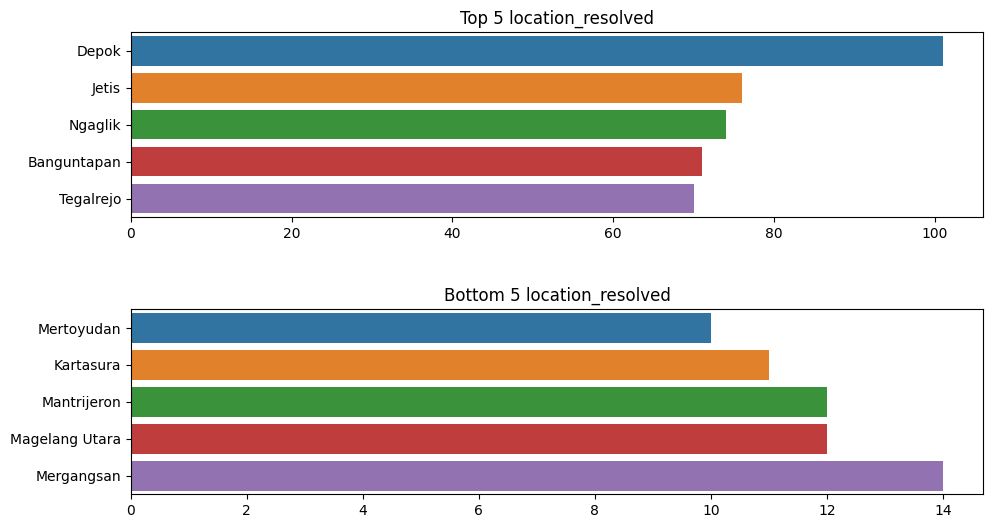

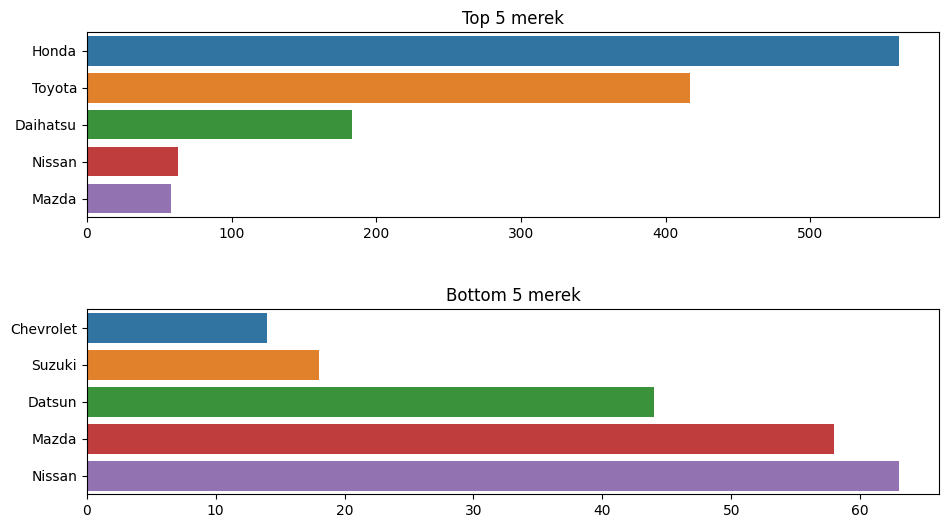

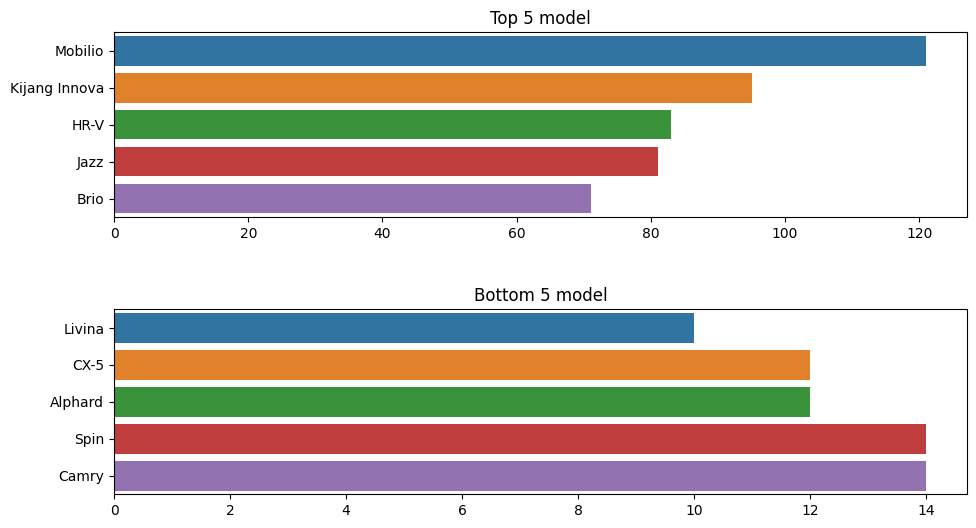

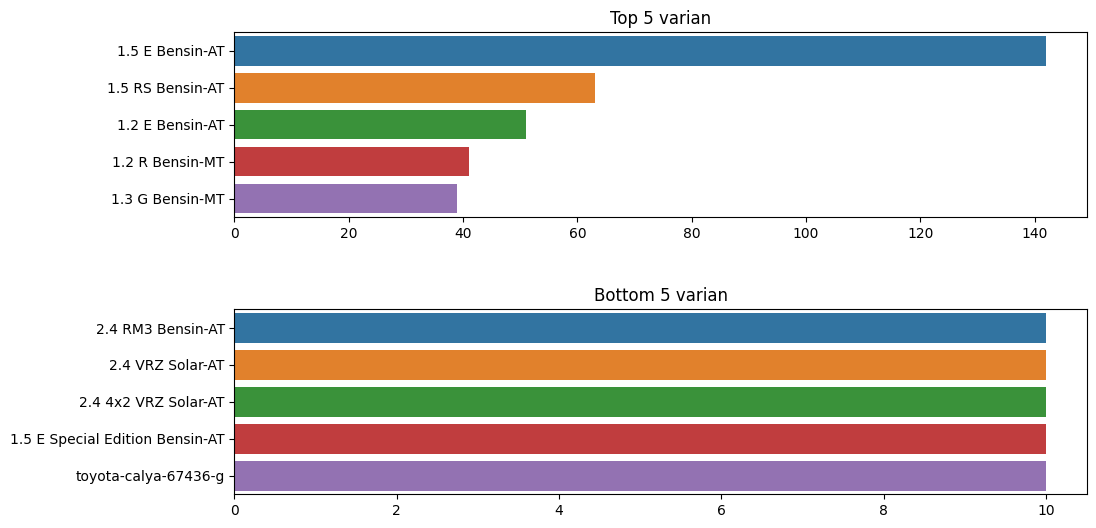

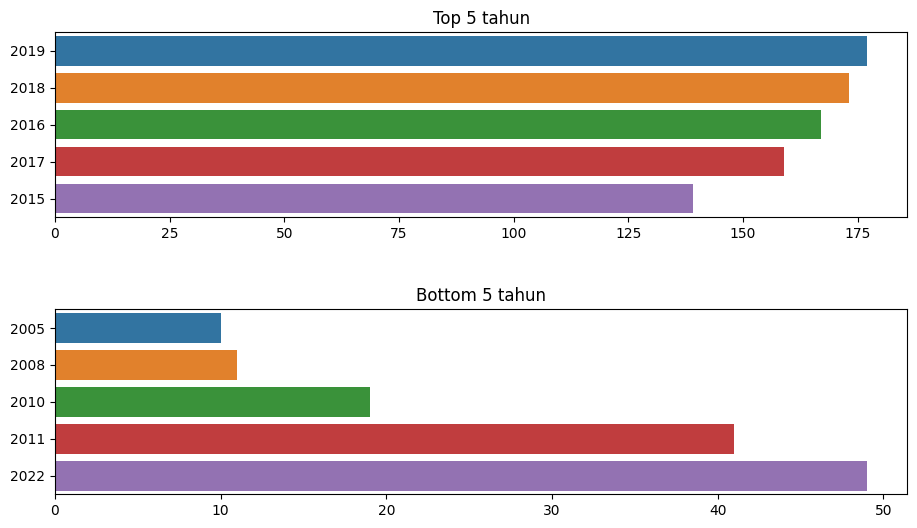

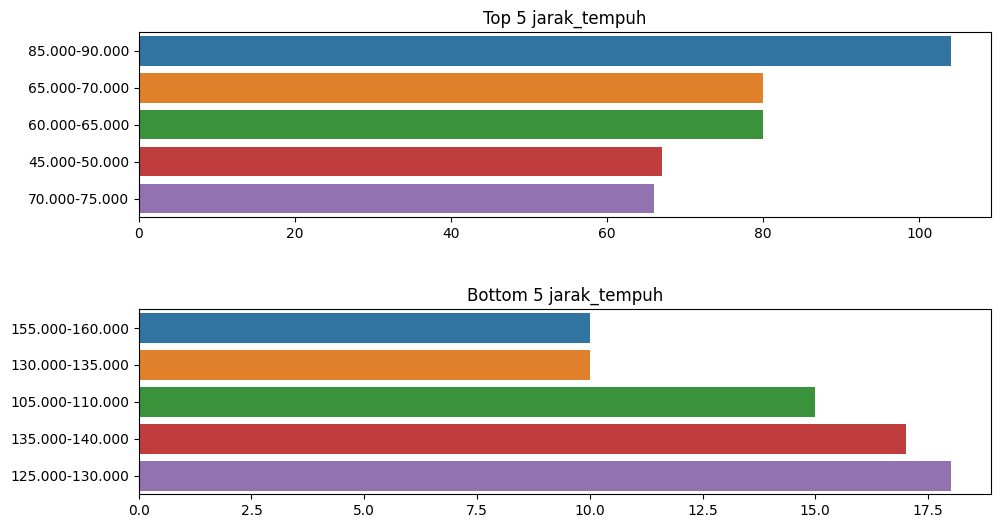

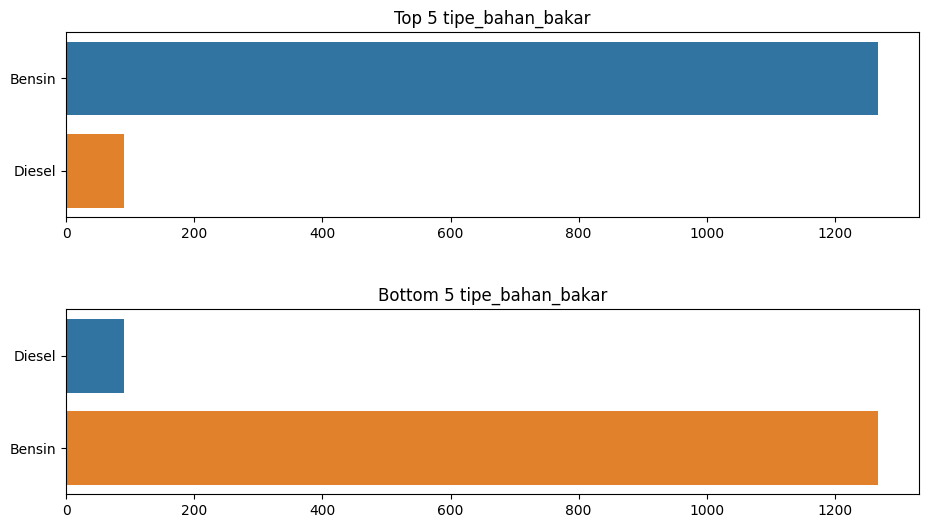

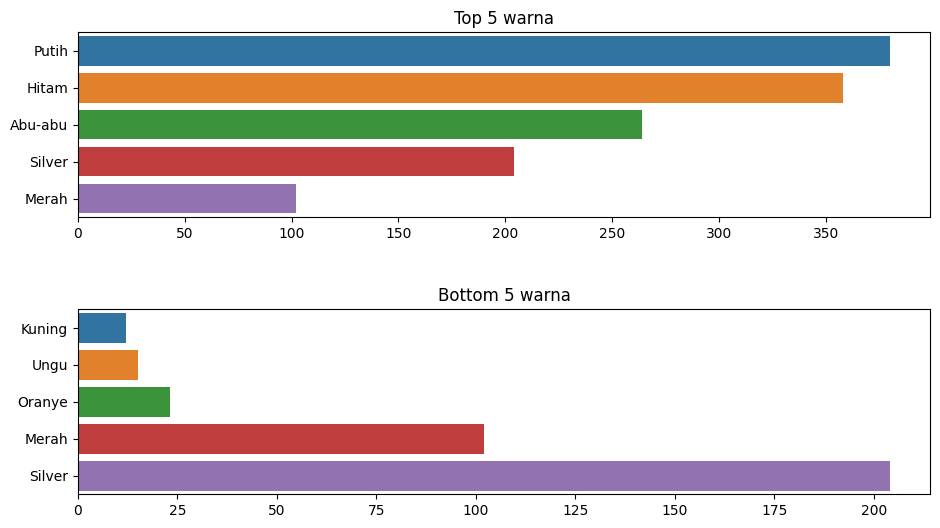

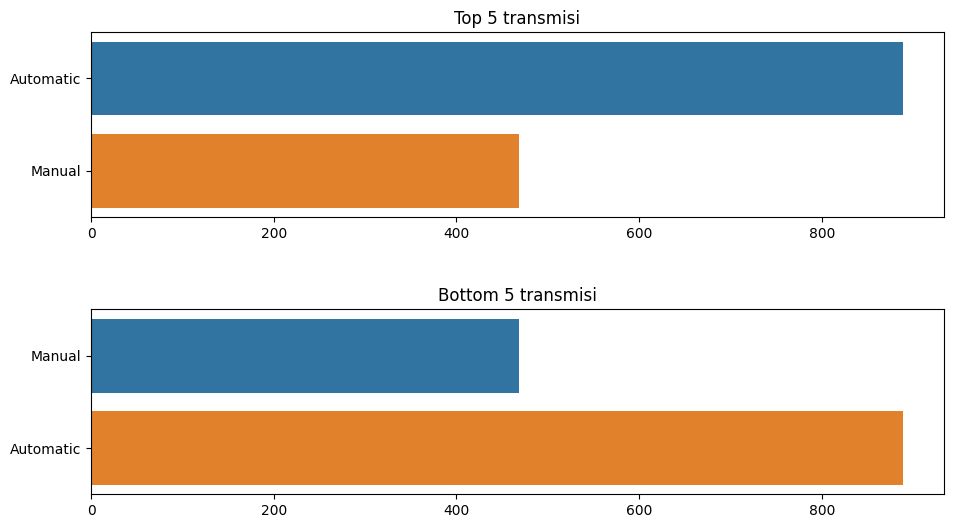

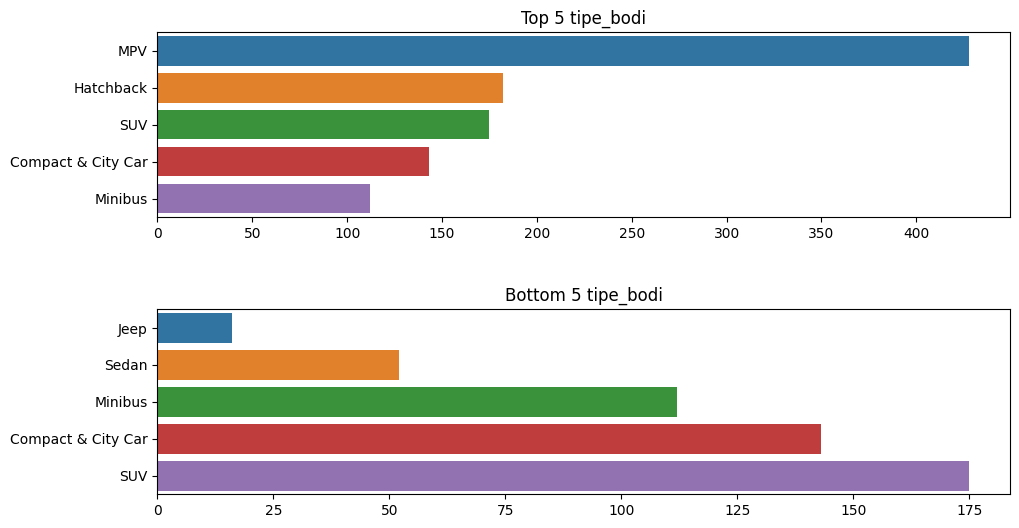

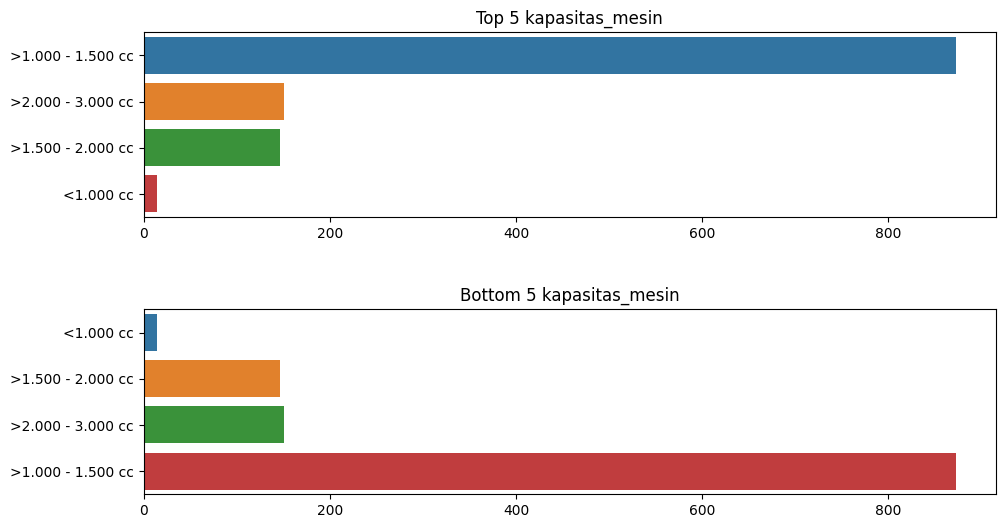

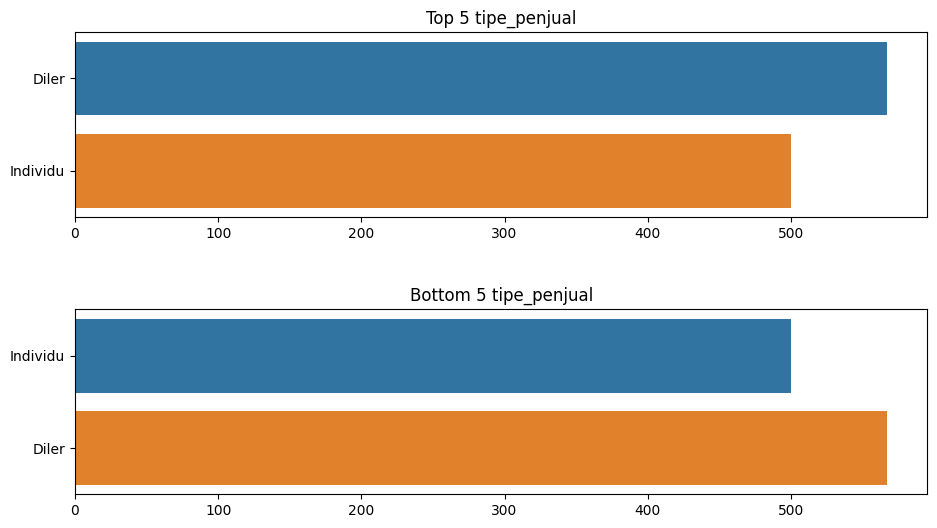

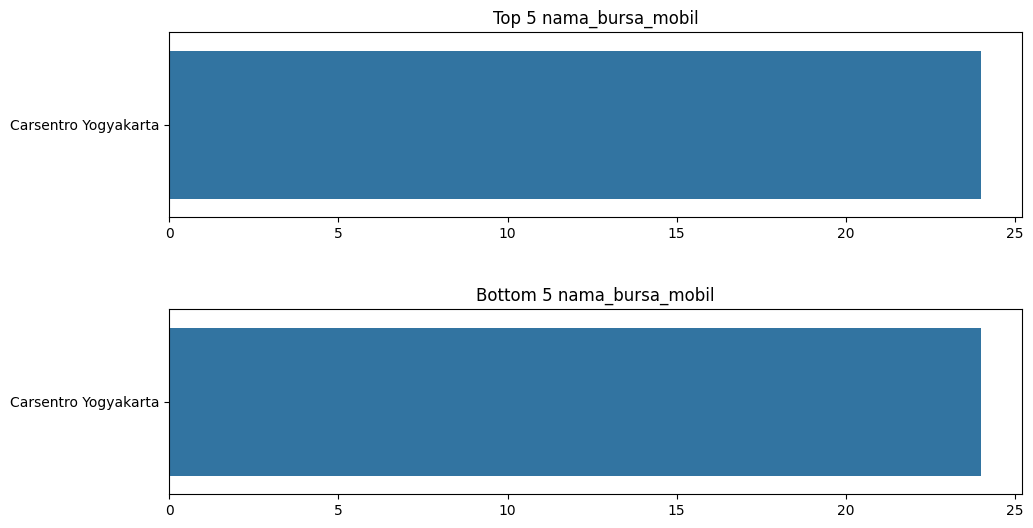

In [10]:
# Menaampilkan visualisasi setelah penghapusan baris yanb bernilai unik dengan frekuensi kurang dari 10
for col in coldrop:
    cat_dist(df,col,value=5)
    plt.subplots_adjust(hspace=.5)

Berdasarkan visualisasi di atas terlihat bahwa variabel `nama_bursa_mobil` hanya memiliki 1 nilai unik dengan frekuensi yang sedikit kemungkinan variabel ini memiliki missing value yang banyak.

In [11]:
# Melakukan looping tiap kolom di coldrop serta menampilkan nilai unik dari masing masing kolom
for col in coldrop:
    print(df[col].value_counts().index)
    

Index(['Depok', 'Jetis', 'Ngaglik', 'Banguntapan', 'Tegalrejo', 'Sleman',
       'Banjarsari', 'Mlati', 'Magelang Tengah', 'Umbulharjo', 'Laweyan',
       'Gamping', 'Jebres', 'Grogol', 'Kotagede', 'Serengan', 'Piyungan',
       'Kalasan', 'Wates', 'Prambanan', 'Kasihan', 'Pasar Kliwon', 'Bantul',
       'Purworejo', 'Gondokusuman', 'Kraton', 'Pleret', 'Sewon', 'Wonosari',
       'Magelang Selatan', 'Godean', 'Klaten Tengah', 'Jatinom', 'Sukoharjo',
       'Mergangsan', 'Mantrijeron', 'Magelang Utara', 'Kartasura',
       'Mertoyudan'],
      dtype='object')
Index(['Honda', 'Toyota', 'Daihatsu', 'Nissan', 'Mazda', 'Datsun', 'Suzuki',
       'Chevrolet'],
      dtype='object')
Index(['Mobilio', 'Kijang Innova', 'HR-V', 'Jazz', 'Brio', 'Avanza', 'Ayla',
       'CR-V', 'Rush', 'Sigra', 'Calya', 'Yaris', '2', 'Go+ Panca', 'Fortuner',
       'BR-V', 'Grand livina', 'Brio Satya', 'Terios', 'Freed', 'Xenia',
       'Vios', 'Ertiga', 'City', 'Accord', 'Serena', 'Camry', 'Spin', 'CX-5',
       

#### Menghitung missing value yang terdapat pada tiap kolom

In [12]:
# Menghitung missing value yang terdapat pada variabel target
print(f' {df.harga.isnull().sum()} missing values')

 0 missing values


In [13]:
# Menghapus kolom title
df.drop('title',axis=1,inplace=True)

In [14]:
# Menghitung persentase missing value terhadap total baris dataset
null_pct=(df.isnull().sum()/df.shape[0]*100).to_frame('Null Percentage %').style.background_gradient('summer_r')
null_pct

,Null Percentage %
location_resolved,0.000000
display_date,0.000000
harga,0.000000
merek,0.000000
model,0.000000
varian,1.104566
tahun,0.000000
jarak_tempuh,0.000000
tipe_bahan_bakar,0.000000
warna,0.000000


Terdapat 2 tahap untuk menangani missing value:
1. Bila nilai kurang dari 25% maka dilakukan imputasi karena tidak begitu merubah sebaran data.
2. Bila jumlah missing value lebih dari 25% maka kolom tersebut harus dihapus karena data tidak lagi relevan bila melakukan imputasi akan merubah sebaran data yang signifikan.

Berdasarkan visualisasi di atas tampak bahwa `varian`, `tipe_bodi`, `kapasitas_mesin`, `tipe_penjual` masih dibawah 25% persen sehingga dilakukan imputasi.

Namun untuk `nama_bursa_mobil` melebihi 25% sehingga kolom ini harus dihapus.

## Data Cleaning

In [15]:
# Menghapus kolom nama_bursa_mobil
df.drop(['nama_bursa_mobil'],axis=1,inplace=True)


In [16]:
# Meng-update variabel colcat setelah variabel nama_bursa_mobil dihapus
colcat=df.select_dtypes('O').columns.to_list()

# Menampilkan list colcat
colcat

['location_resolved',
 'merek',
 'model',
 'varian',
 'tahun',
 'jarak_tempuh',
 'tipe_bahan_bakar',
 'warna',
 'transmisi',
 'tipe_bodi',
 'kapasitas_mesin',
 'tipe_penjual']

### Melakukan Imputasi

Imputasi yang digunakan adalah menjadikan nilai Nan menjadi undefined agar model mengetahui nilai tersebut adalah missing value

In [17]:
# Melakukan imputasi dengan mengubah nilai Nan menjadi undefined
for col in colcat:
    df[col]=df[col].fillna('undefined')

In [18]:
# Menampilkan data setelah dilakukan imputasi
df.head(5)

,location_resolved,display_date,harga,merek,model,varian,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual
0,Ngaglik,2022-12-21 07:11:44+00:00,138000000.0,Toyota,Vios,1.5 G Bensin-MT,2017,85.000-90.000,Bensin,Hitam,Manual,Sedan,>1.000 - 1.500 cc,Diler
3,Wonosari,2022-12-22 07:40:07+00:00,221000000.0,Toyota,Camry,2.5 V Bensin-AT,2014,55.000-60.000,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Individu
4,Pleret,2022-12-22 09:45:17+00:00,133000000.0,Toyota,Avanza,1.3 G Bensin-MT,2015,90.000-95.000,Bensin,Silver,Manual,Minibus,>1.000 - 1.500 cc,undefined
5,Depok,2022-12-22 09:25:14+00:00,140000000.0,Toyota,Rush,1.5 S Bensin-AT,2013,85.000-90.000,Bensin,Abu-abu,Automatic,Jeep,>1.000 - 1.500 cc,Individu
9,Mlati,2022-12-22 07:52:34+00:00,435000000.0,Toyota,Kijang Innova,2.4 G Solar-AT,2022,0-5.000,Diesel,Hitam,Automatic,Minibus,>2.000 - 3.000 cc,undefined


In [19]:
# df['jarak_tempuh_clean']=df.jarak_tempuh.str.replace('>300.000','300000-300001',regex=False)
# df.jarak_tempuh_clean=df.jarak_tempuh_clean.str.replace('.','',regex=False)
# df[['jarak_tempuh_fr','jarak_tempuh_to']]=df.jarak_tempuh_clean.str.split('-',expand=True)
# df[['jarak_tempuh_fr','jarak_tempuh_to']]=df[['jarak_tempuh_fr','jarak_tempuh_to']].astype('float')

In [20]:
# Menampilkan jumlah missing value setelah dilakukan imputasi
df.isnull().sum()

location_resolved    0
display_date         0
harga                0
merek                0
model                0
varian               0
tahun                0
jarak_tempuh         0
tipe_bahan_bakar     0
warna                0
transmisi            0
tipe_bodi            0
kapasitas_mesin      0
tipe_penjual         0
dtype: int64

In [21]:
# colcat=df.select_dtypes('O').columns.to_list()
# cat_unused=['jarak_tempuh','jarak_tempuh_clean']
# for col in cat_unused:colcat.remove(col)
# colcat

In [22]:
# Memisahkan variabel target dan memilih kolom bertipe data numerik serta menyimpannya ke variabel colnum
target='harga'
colnum=df.drop(target,axis=1).select_dtypes(['float','int']).columns.to_list()
colnum


[]

Hasil yang didapatkan bahwa tidak terdapat data yang bertipe data numerik

In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

## Model Fitting/Developing 

### Menginisialisasi Preprocessor dan Model

In [24]:
# Preprocessor
le=LabelEncoder()
ohe=OneHotEncoder(drop='first')
scaler=MinMaxScaler()

# Model
rf=RandomForestRegressor(random_state=1,n_jobs=-1)

### Memisahkan data menjadi Training Data dan Testing Data

In [25]:
# Variabel Prediktor
X=df[colcat+colnum]

# Variabel target/ respon
y=df[target]

# memisahkan data menjadi training data dan testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)


# Menampilkan bentuk dari tiap training dan testing data
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (950, 12)
y_train : (950,)
X_test : (408, 12)
y_test : (408,)


In [26]:
# Menampilkan sebagian dari variabel testing
X_test.head()

,location_resolved,merek,model,varian,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual
1316,Grogol,Toyota,Camry,2.5 V Bensin-AT,2017,25.000-30.000,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Diler
3339,Piyungan,Suzuki,Ertiga,1.4 GL Bensin-MT,2018,10.000-15.000,Bensin,Silver,Manual,MPV,>1.000 - 1.500 cc,Diler
1441,Kalasan,Honda,Mobilio,1.5 S Bensin-MT,2016,45.000-50.000,Bensin,Silver,Manual,MPV,>1.000 - 1.500 cc,Diler
510,Sleman,Toyota,Kijang Innova,2.4 V Solar-AT,2017,80.000-85.000,Bensin,Putih,Automatic,MPV,>2.000 - 3.000 cc,Individu
698,Ngaglik,Toyota,Yaris,1.5 E Bensin-AT,2011,115.000-120.000,Bensin,Silver,Automatic,undefined,undefined,Individu


In [27]:
# Menampilkan sebagian dari variabel training
X_train.head()

,location_resolved,merek,model,varian,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual
853,Sewon,Toyota,Yaris,1.5 TRD Sportivo Bensin-MT,2014,70.000-75.000,Bensin,Oranye,Manual,Hatchback,>1.000 - 1.500 cc,undefined
2663,Banguntapan,Daihatsu,Terios,1.5 R Bensin-MT,2021,5.000-10.000,Bensin,Ungu,Manual,MPV,>1.500 - 2.000 cc,undefined
1715,Jetis,Honda,Brio,1.2 RS Bensin-AT,2019,20.000-25.000,Bensin,Putih,Automatic,undefined,undefined,undefined
1266,Laweyan,Toyota,Rush,1.5 TRD Sportivo Bensin-AT,2019,55.000-60.000,Bensin,Putih,Automatic,undefined,>1.000 - 1.500 cc,Individu
3075,Laweyan,Daihatsu,Sigra,daihatsu-sigra-66669-12-r,2019,50.000-55.000,Bensin,Silver,Automatic,MPV,>1.000 - 1.500 cc,undefined


### Menginisialisasikan PipeLine dan Melakukan Fitting Model serta memvalidasi Model

#### Label Encoding menggunakan One Hot Encoder

In [28]:
# Menginisialisasi preprocessor dengan kolomnya
ct= make_column_transformer(
    (ohe,colcat),
    (scaler,colnum),
    remainder='passthrough'
)

# Menginisialisasi pipeline
pipe=make_pipeline(ct,rf)

# Melakukan Fitting Model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['location_resolved', 'merek',
                                                   'model', 'varian', 'tahun',
                                                   'jarak_tempuh',
                                                   'tipe_bahan_bakar', 'warna',
                                                   'transmisi', 'tipe_bodi',
                                                   'kapasitas_mesin',
                                                   'tipe_penjual']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(), [])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])

##### Validasi Model

In [29]:
# Hasil prediksi
y_pred=pipe.predict(X_test)

# Validasi model
print(1-mean_absolute_percentage_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9251669037374304
16046617.009826388


#### Label Encoding menggunakan Label Encoder

In [30]:
# Preprocessing menggunakan Label Encoder
for col in colcat:
    X_train[col]=le.fit_transform(X_train[col])
    X_test[col]=le.fit_transform(X_test[col])
    

In [31]:
# Menginisialisasi preprocessor dengan kolomnya
ct= make_column_transformer(
    (scaler,colnum+colcat),
    remainder='passthrough'
)

# Menginisialisasi pipeline
pipe=make_pipeline(ct,rf)

# Melakukan Fitting Model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['location_resolved', 'merek',
                                                   'model', 'varian', 'tahun',
                                                   'jarak_tempuh',
                                                   'tipe_bahan_bakar', 'warna',
                                                   'transmisi', 'tipe_bodi',
                                                   'kapasitas_mesin',
                                                   'tipe_penjual'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=1))])

##### Validasi Model

In [32]:
y_pred=pipe.predict(X_test)

print(1-mean_absolute_percentage_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9235133341561045
15113022.266053513


Berdasarkan hasil fitting 2 preprocessor di atas didapat bahwa One Hot Encoder lebih baik dalam menangani data kategorikal.

## Variable Important

In [33]:
# Menampilkan variabel beserta information gain-nya
feat_important=pd.DataFrame([X_train.columns,rf.feature_importances_]).T.sort_values(1,ascending=False)
feat_important.columns=['variable','information_gain']
feat_important

,variable,information_gain
3,varian,0.389514
4,tahun,0.224883
2,model,0.142694
6,tipe_bahan_bakar,0.133042
0,location_resolved,0.030083
1,merek,0.022298
5,jarak_tempuh,0.020652
9,tipe_bodi,0.012895
7,warna,0.007134
10,kapasitas_mesin,0.007083


## Perbandingan Nilai Prediksi dan Nilai Aktual

In [34]:
# Menampilkan Perbandingan nilai prediksi dan nilai aktual beserta perbedaannya
results=pd.DataFrame([y_pred.astype('int'),y_test]).T
results.columns=columns=['prediction','actual']
results['diff in million']=((results.prediction-results.actual)/1000000).round(2)
results.head(10)

,prediction,actual,diff in million
0,339535000.0,339000000.0,0.54
1,163229999.0,158000000.0,5.23
2,145800000.0,131000000.0,14.80
3,293620000.0,304000000.0,-10.38
4,105180000.0,116000000.0,-10.82
5,378430000.0,408000000.0,-29.57
6,159765000.0,166000000.0,-6.24
7,145340000.0,137000000.0,8.34
8,185100000.0,195000000.0,-9.90
9,260489999.0,229000000.0,31.49


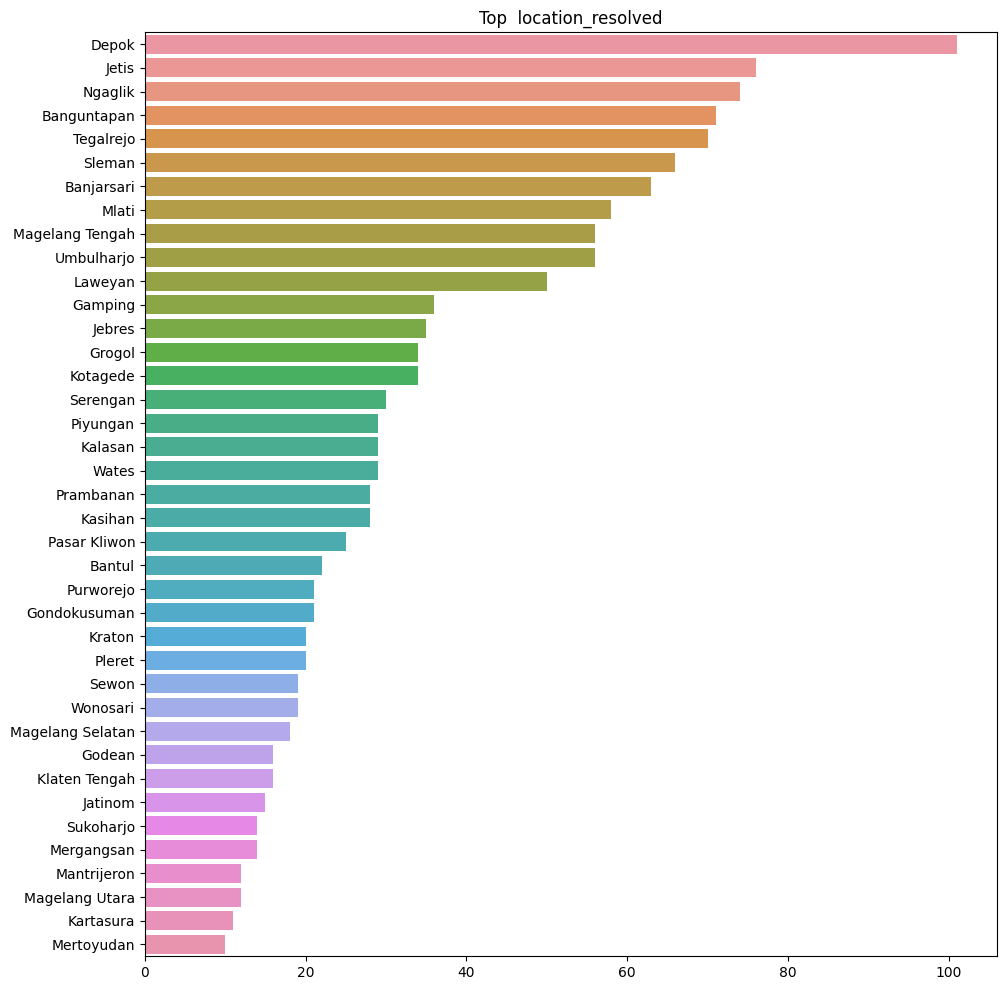

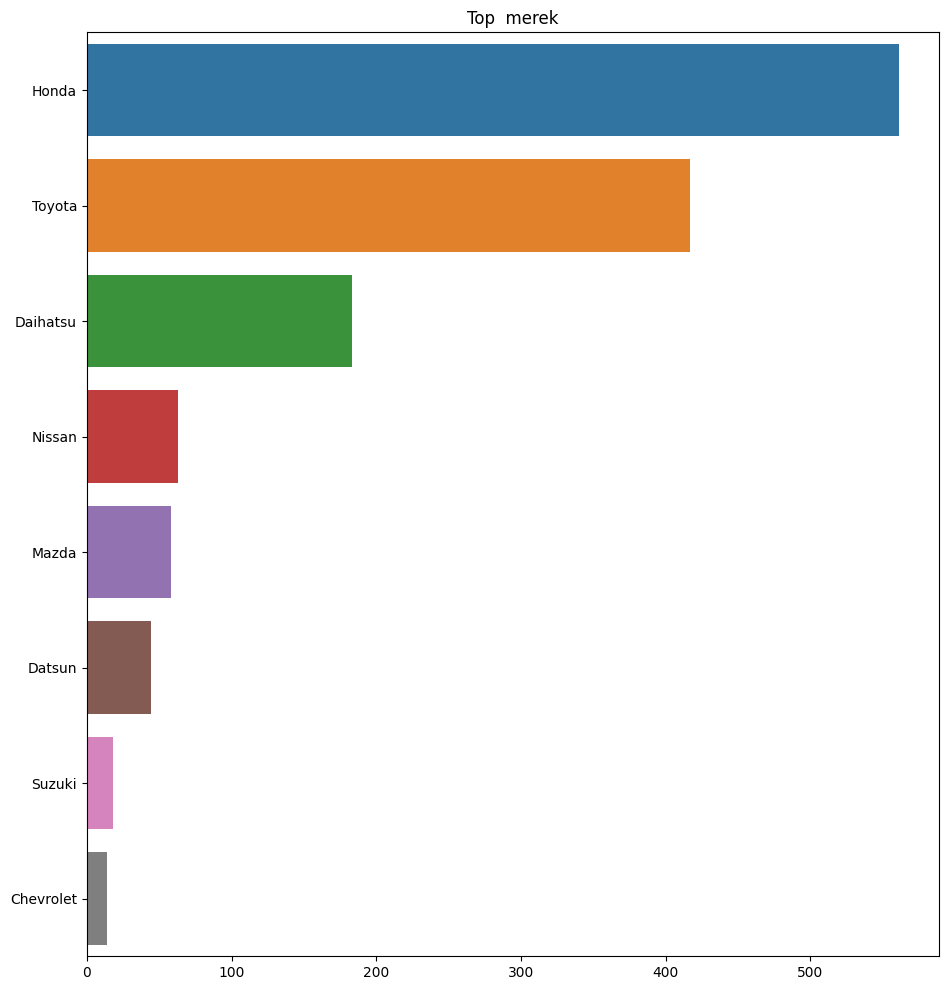

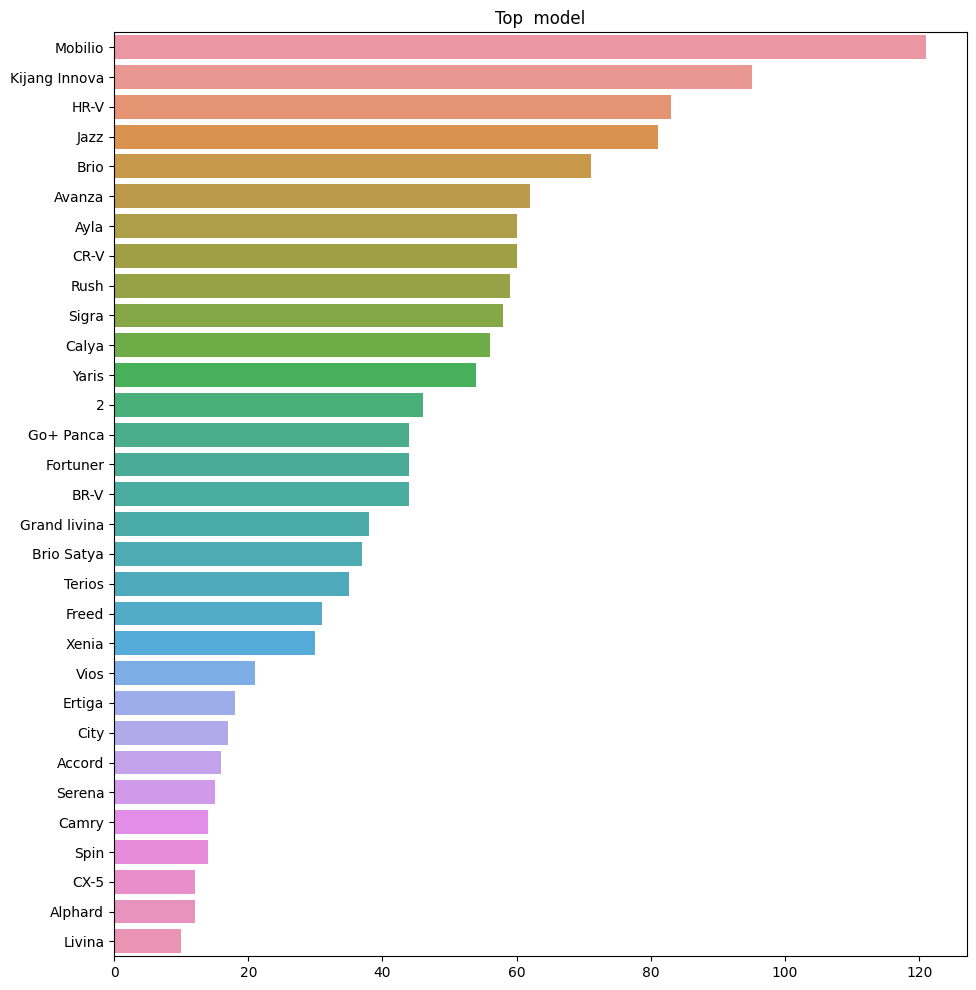

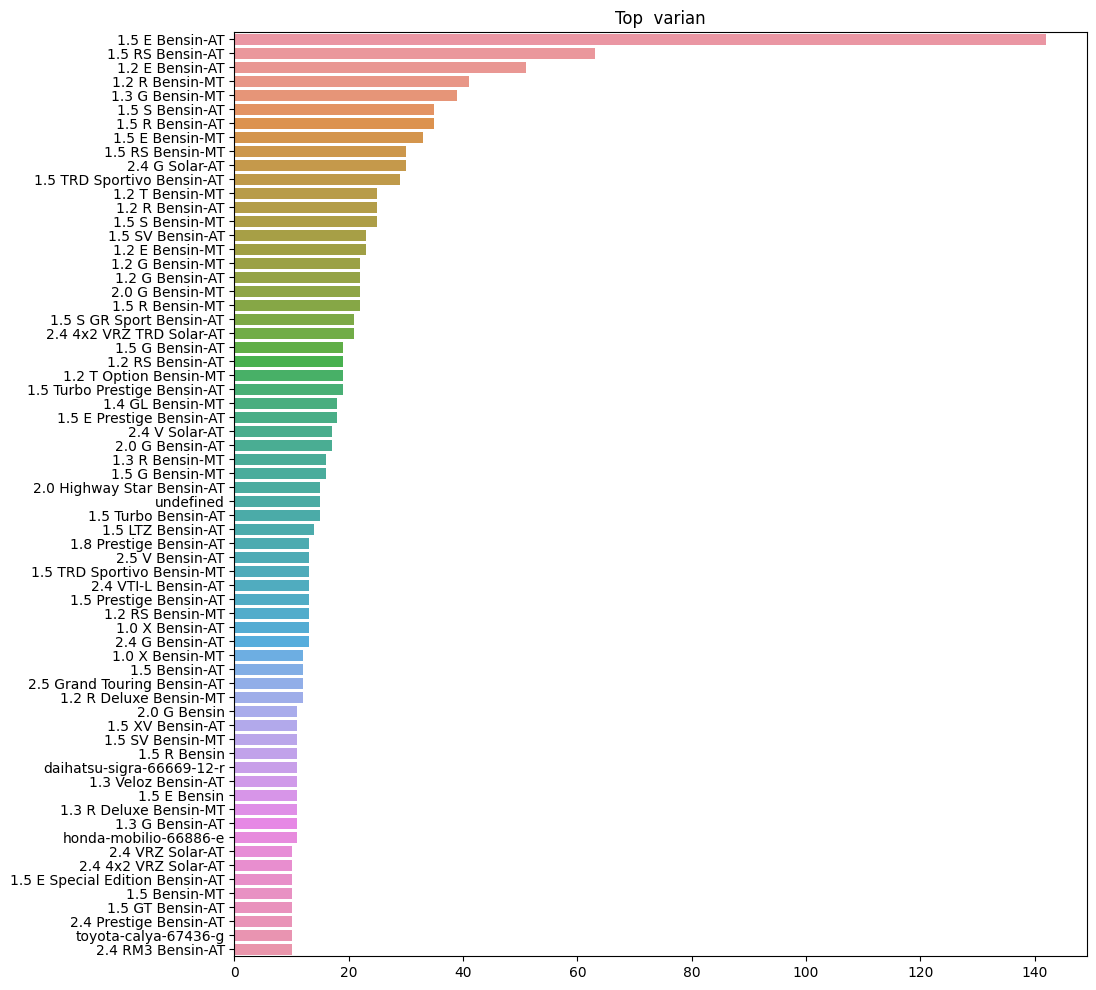

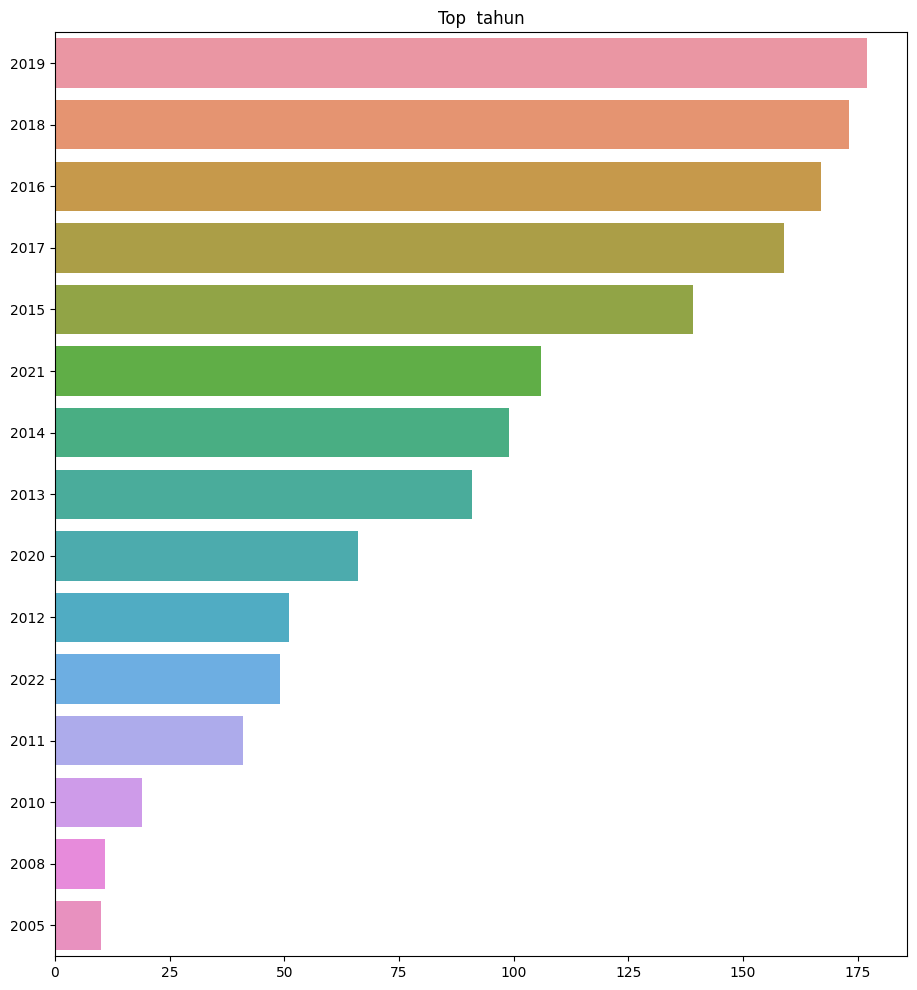

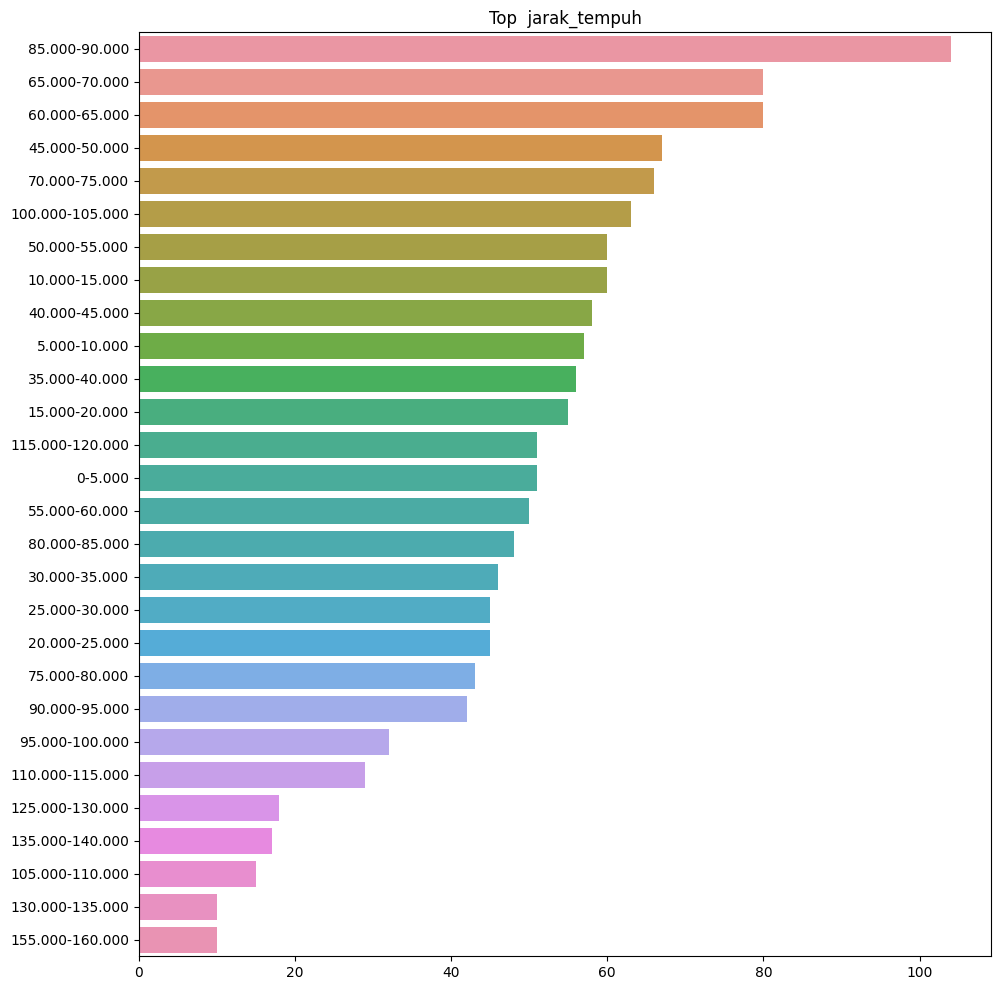

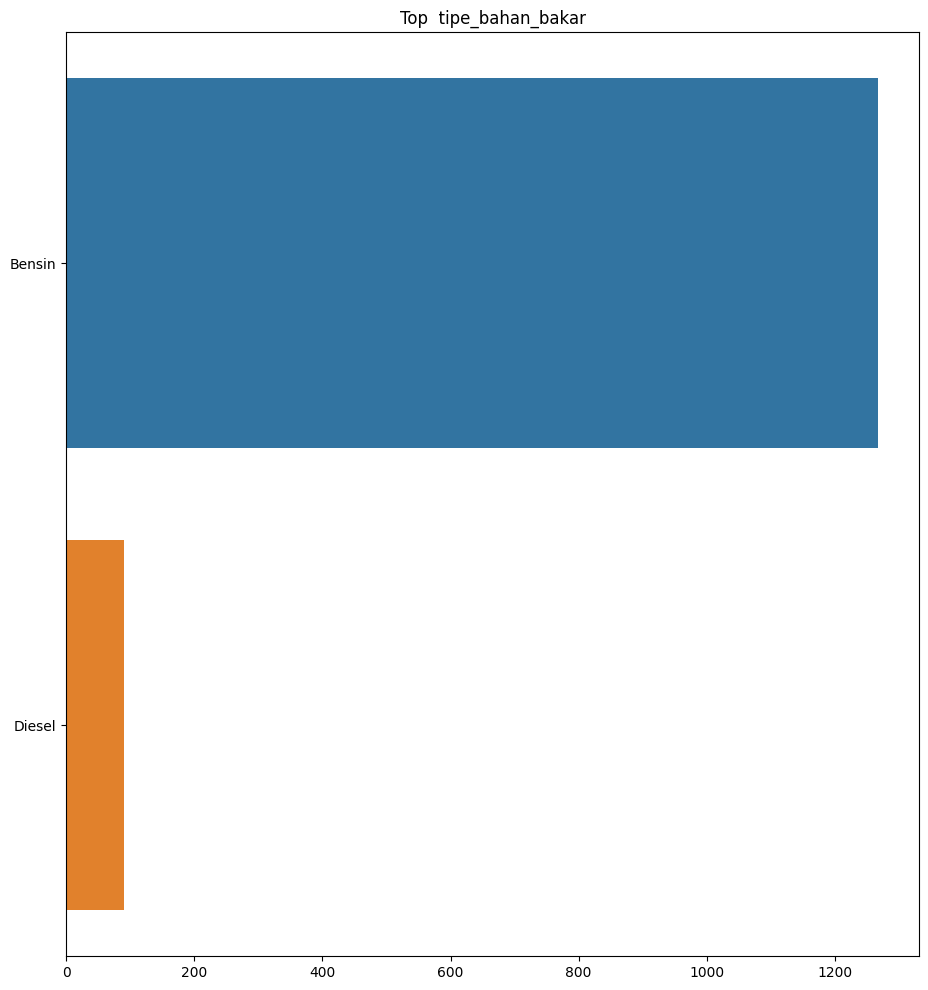

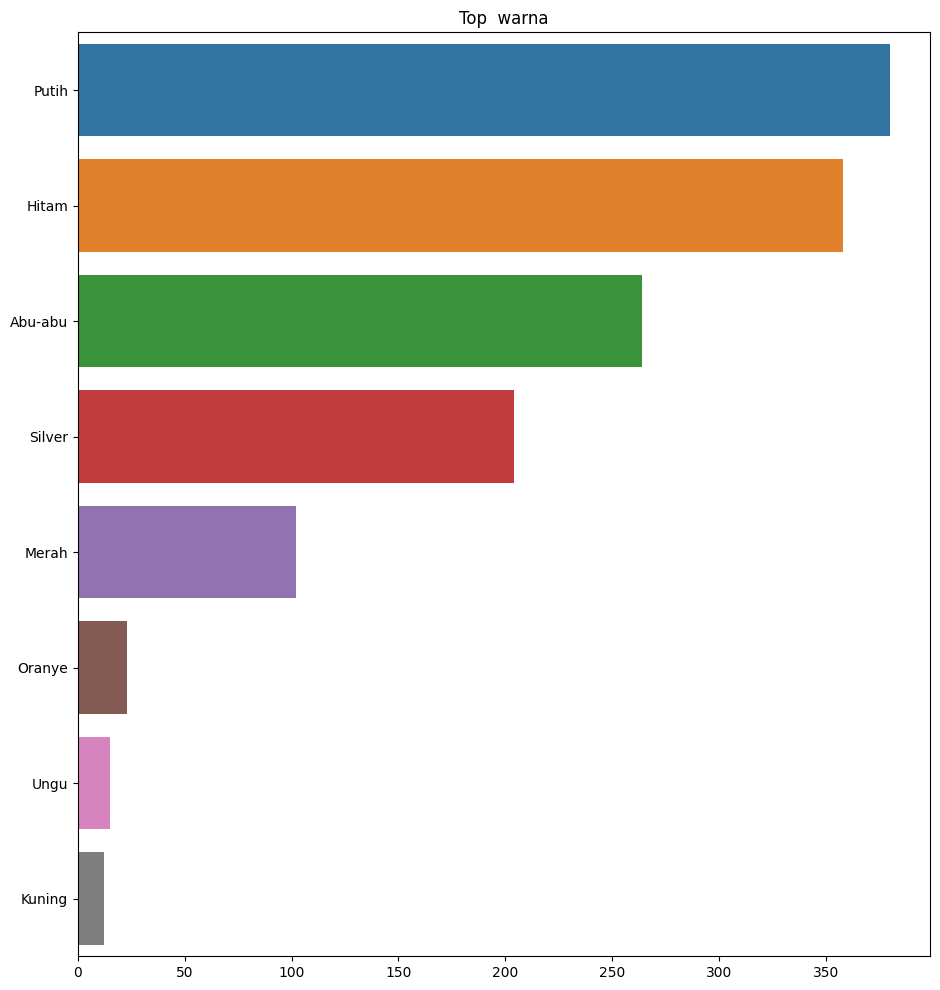

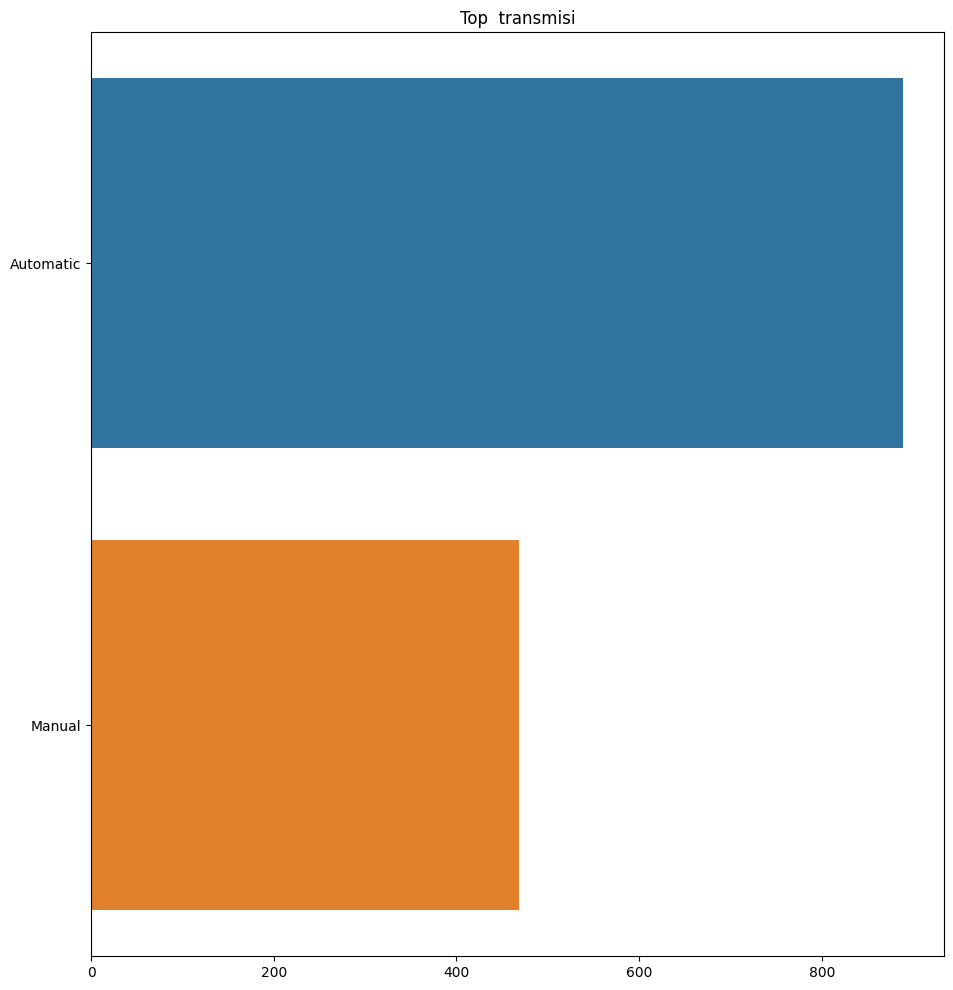

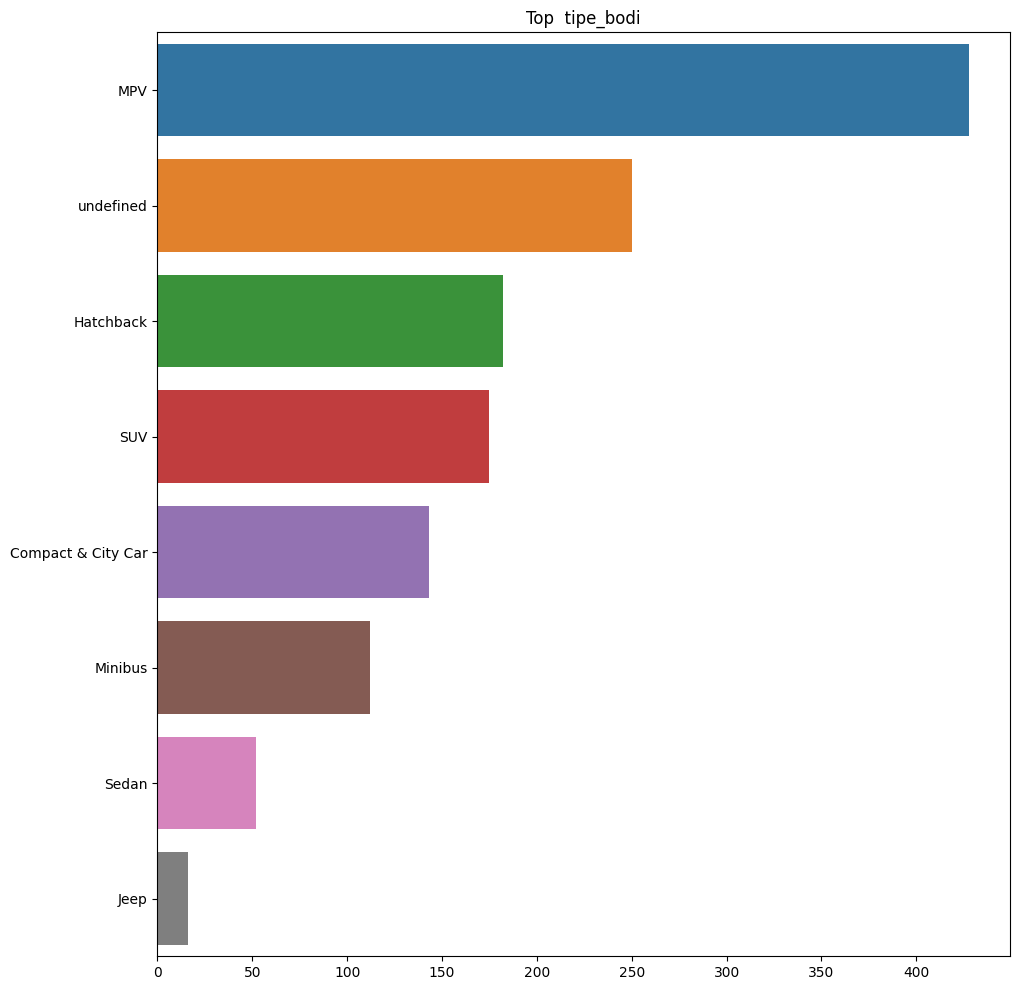

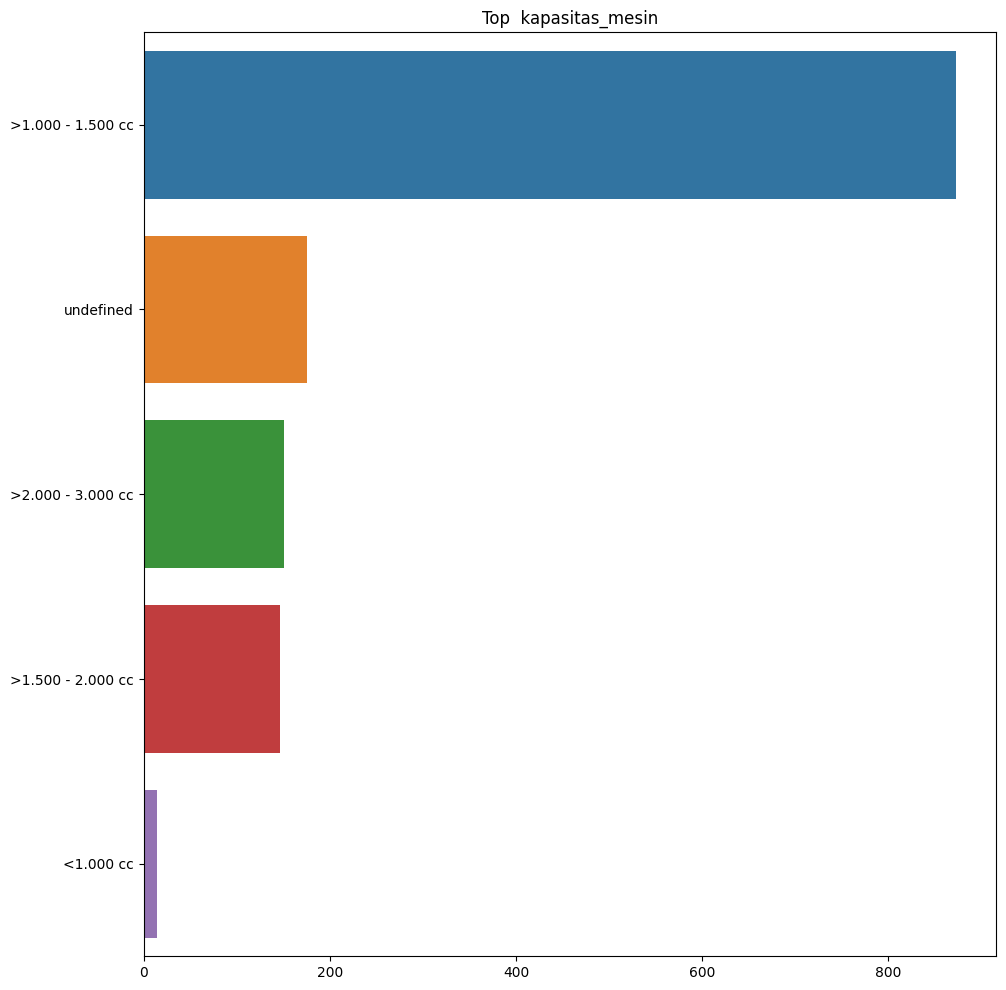

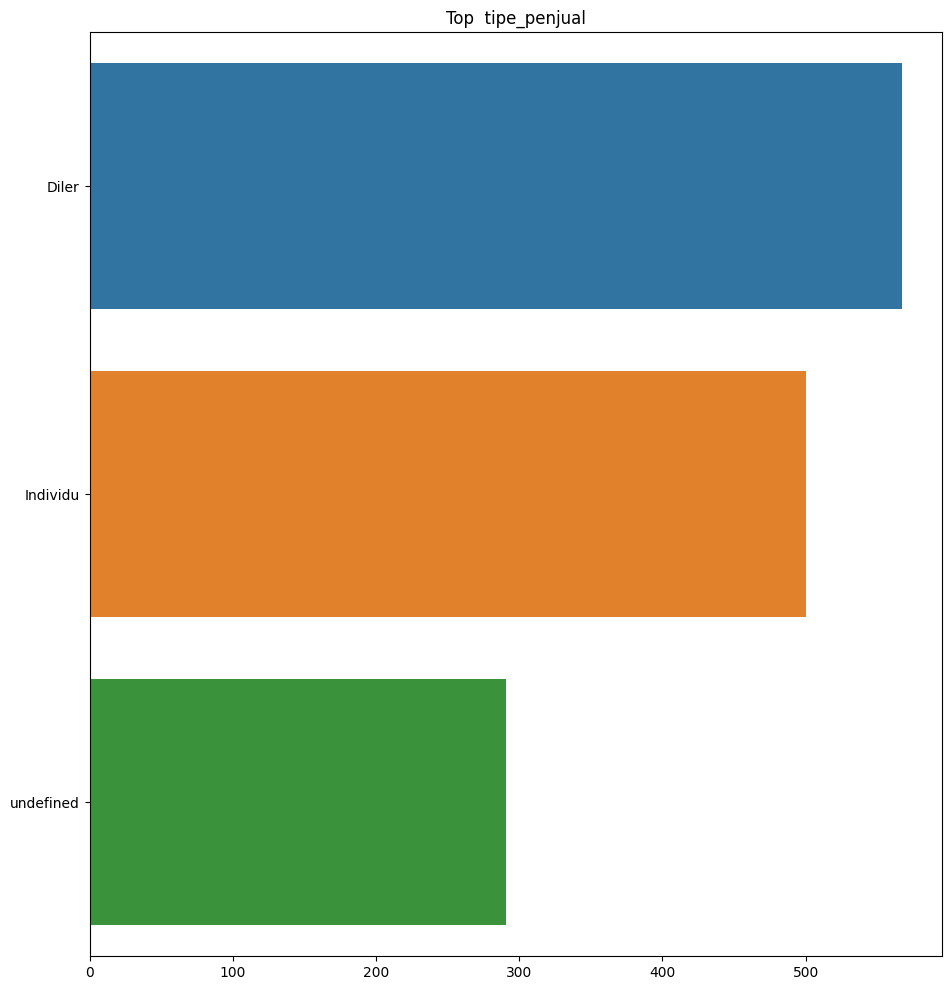

In [35]:
size=(11,12)
for col in colcat:
    cat_dist(df,col)

## Hyper Parameter Tunning

Karena data training dan testing telah berubah disebabkan fitting menggunakan Label Encoder maka data harus di rubah ulang menjadi ke bentuk awal

In [36]:
# Variabel Prediktor
X=df[colcat+colnum]

# Variabel target/ respon
y=df[target]

# memisahkan data menjadi training data dan testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)


# Menampilkan bentuk dari tiap training dan testing data
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (950, 12)
y_train : (950,)
X_test : (408, 12)
y_test : (408,)


In [37]:
parameters={
    'randomforestregressor__n_estimators': [200],
    'randomforestregressor__criterion':['absolute_error'],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth':[10,  50,  100, None],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    
}

In [38]:
# Menginisialisasi preprocessor dengan kolomnya
ct= make_column_transformer(
    (ohe,colcat),
    (scaler,colnum),
    remainder='passthrough'
)

# Menginisialisasi pipeline
pipe=make_pipeline(ct,rf)

# Menginisialisasi grid search cv
grid=GridSearchCV(pipe,parameters,scoring='neg_mean_absolute_percentage_error',cv=5, n_jobs=-1)

# Melakukan Fitting Model
grid.fit(X_train,y_train)